<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('sat_scores.csv','r') as f:
    rows=f.readlines()
    keys=rows[0]
    values=rows[1:]       

In [3]:
key=keys.replace('\n','').split(',')

value1=[]
for value in values:
    value1.append(value.replace('\n','').split(','))

In [4]:
# converting from row to column values and appending it to a dictionary with the relevant key
# converting string integers to float objects
value2=[]
data_dict={}
for ind,val in enumerate(key):
    temp_data=[]
    for item in value1:
        if item[ind].isnumeric()==True:
            temp_data.append(float(item[ind]))
        else:
            temp_data.append(item[ind])
    data_dict[val]=temp_data
    
data_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0,
  45.0],
 'Verbal': [509.0,
  499.0,
  511.0,
  495.0,
  520.0,
  501.0,
  500.0,
  511.0,
  506.0,
  510.0,
  501.0,
  508.0,
  493.0,
  491.0,
  499.0,
  486.0,
  482.0,

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0,
  45.0],
 'Verbal': [509.0,
  499.0,
  511.0,
  495.0,
  520.0,
  501.0,
  500.0,
  511.0,
  506.0,
  510.0,
  501.0,
  508.0,
  493.0,
  491.0,
  499.0,
  486.0,
  482.0,

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
df1=pd.read_csv('sat_scores.csv')
print(df1.dtypes)

df2=pd.DataFrame.from_dict(data_dict)
print(df2.dtypes)

# there is no difference for the two methods

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
df1.head(10).describe()

,Rate,Verbal,Math
count,10.000000,10.000000,10.000000
mean,73.900000,506.200000,506.400000
std,5.321863,7.465476,6.703233
min,68.000000,495.000000,499.000000
25%,69.500000,500.250000,500.250000
50%,71.500000,507.500000,505.500000
75%,78.500000,510.750000,512.250000
max,82.000000,520.000000,516.000000


,Rate,Verbal,Math
count,10.000000,10.000000,10.000000
mean,73.900000,506.200000,506.400000
std,5.321863,7.465476,6.703233
min,68.000000,495.000000,499.000000
25%,69.500000,500.250000,500.250000
50%,71.500000,507.500000,505.500000
75%,78.500000,510.750000,512.250000
max,82.000000,520.000000,516.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5, 1.0, 'Passing Rate Distribution')

Text(0.5, 1.0, 'Passing Rate Distribution')

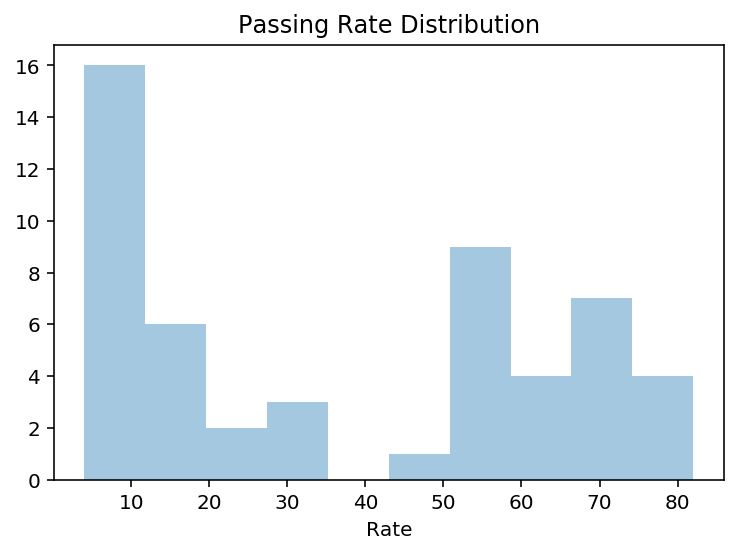

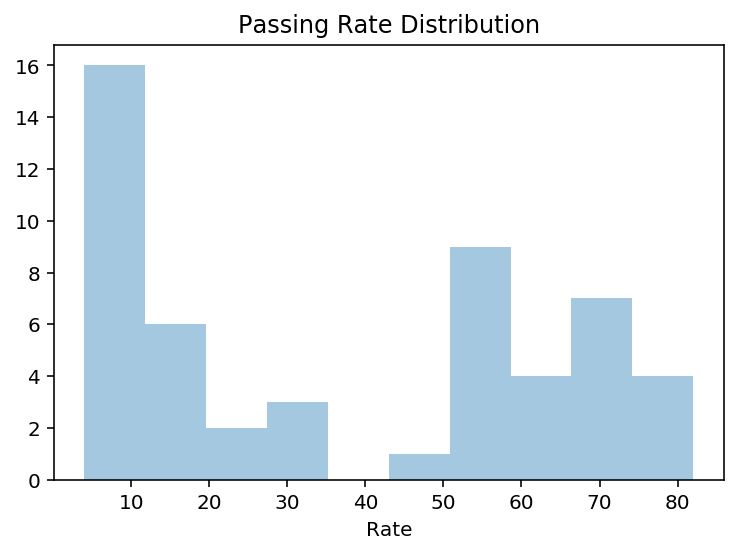

In [8]:
# plotting the distribution fo Rate
plt.figure
plot1=sns.distplot(df2["Rate"],bins=10,kde=False)
plt.title('Passing Rate Distribution')

Text(0.5, 1.0, 'Math Distribution')

Text(0.5, 1.0, 'Math Distribution')

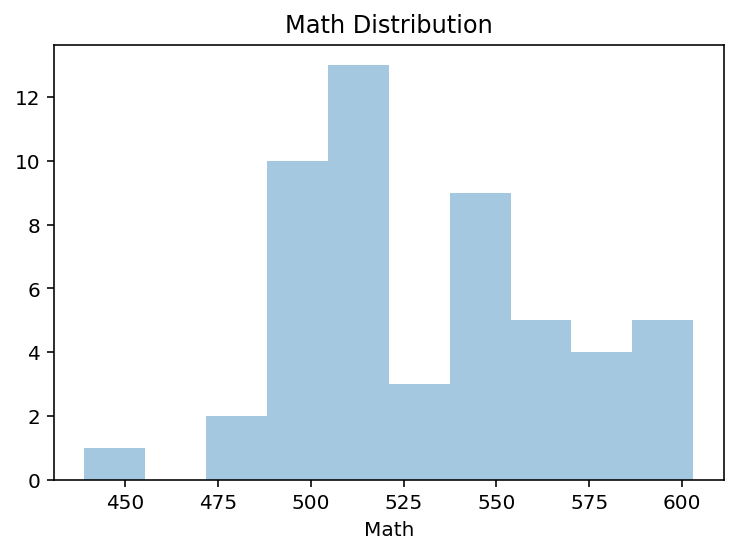

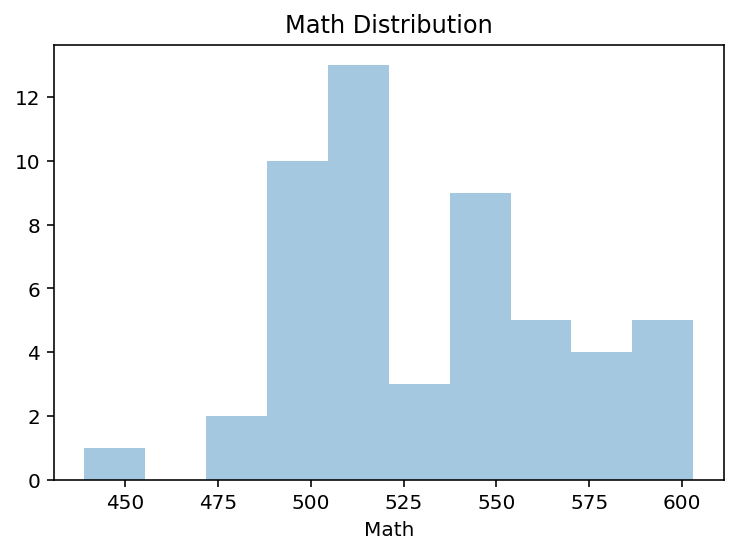

In [9]:
# plotting the distribution for Math
plot2=sns.distplot(df2["Math"],bins=10,kde=False)
plt.title('Math Distribution')

Text(0.5, 1.0, 'Verbal Distribution')

Text(0.5, 1.0, 'Verbal Distribution')

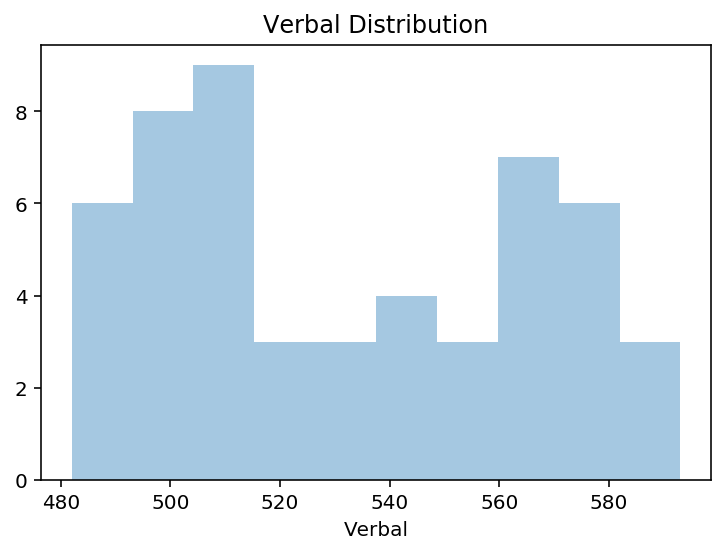

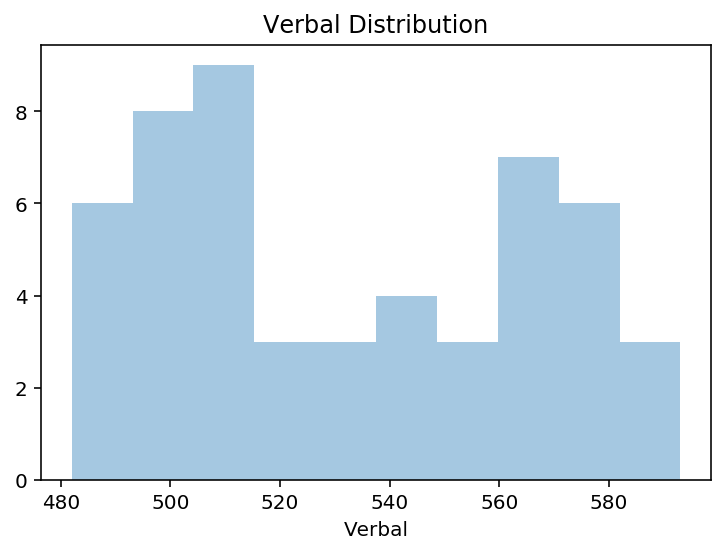

In [10]:
# plotting the distribution for Verbal
plot3=sns.distplot(df2["Verbal"],bins=10,kde=False)
plt.title('Verbal Distribution')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

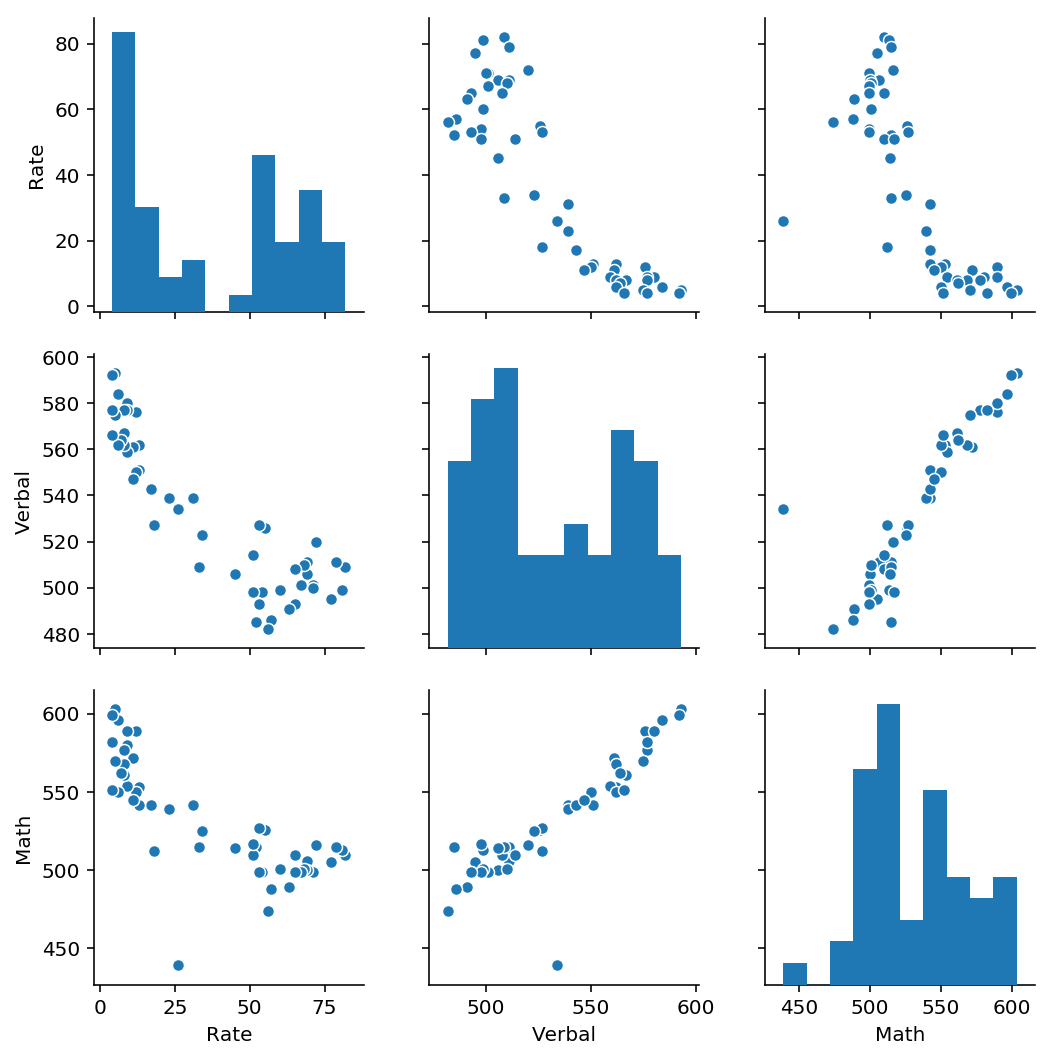

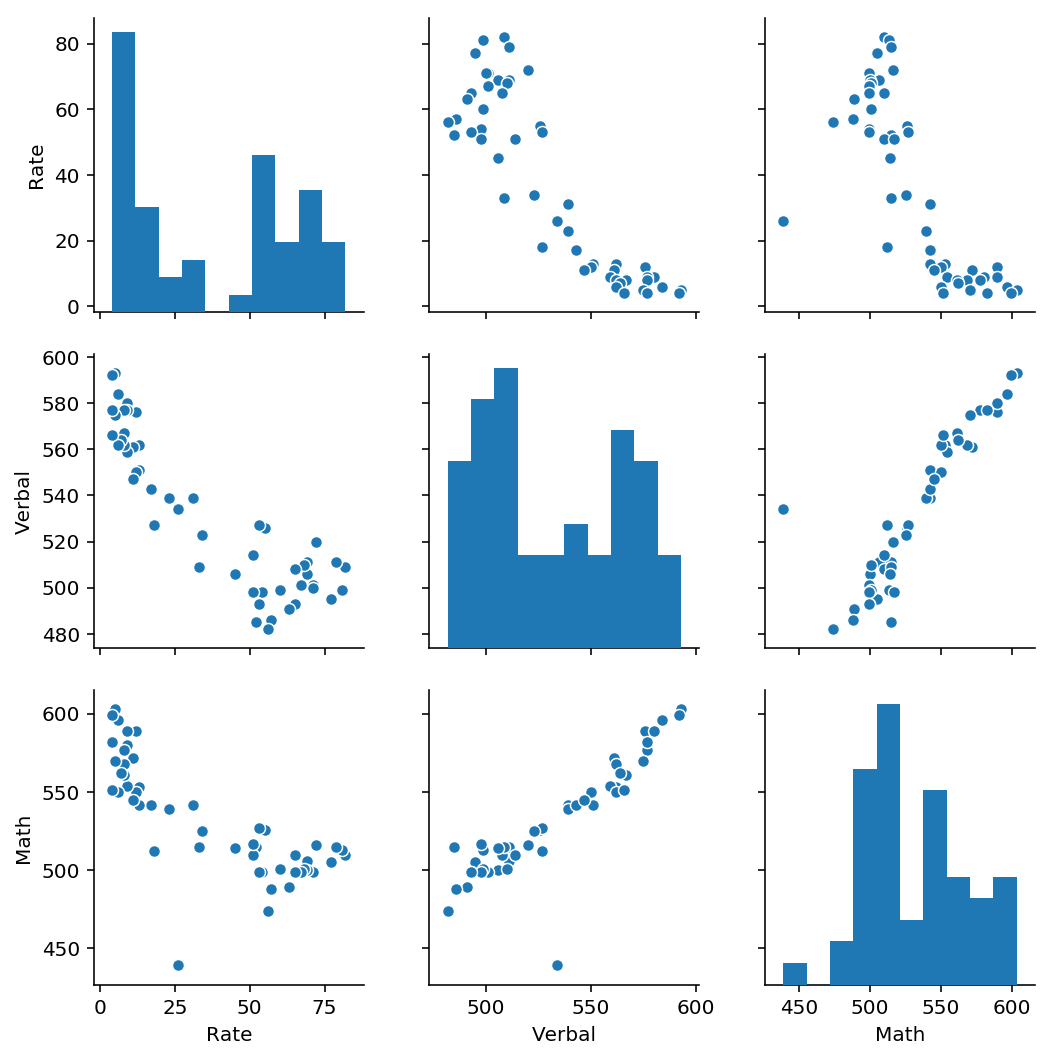

In [11]:
sns.pairplot(df1)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [12]:
import matplotlib.pyplot as plt

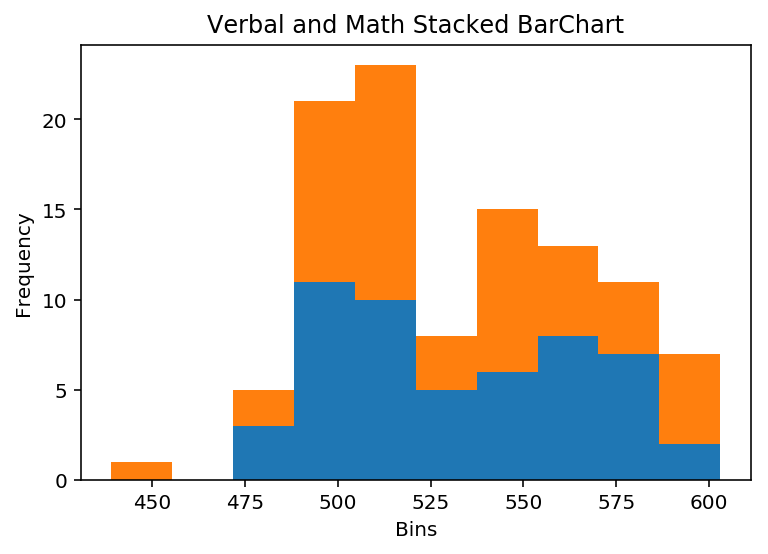

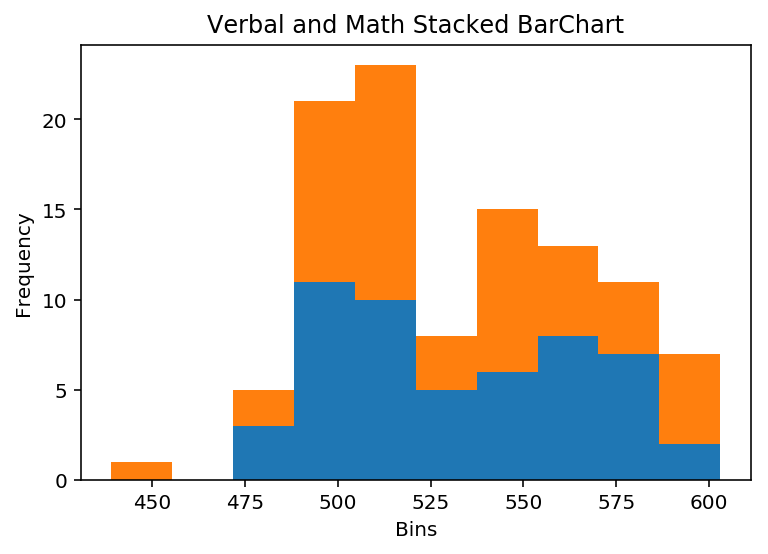

In [13]:
plt.figure()
plt.hist([df1['Verbal'],df1['Math']], stacked=True)
plt.title('Verbal and Math Stacked BarChart')
plt.ylabel('Frequency')
plt.xlabel('Bins')
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

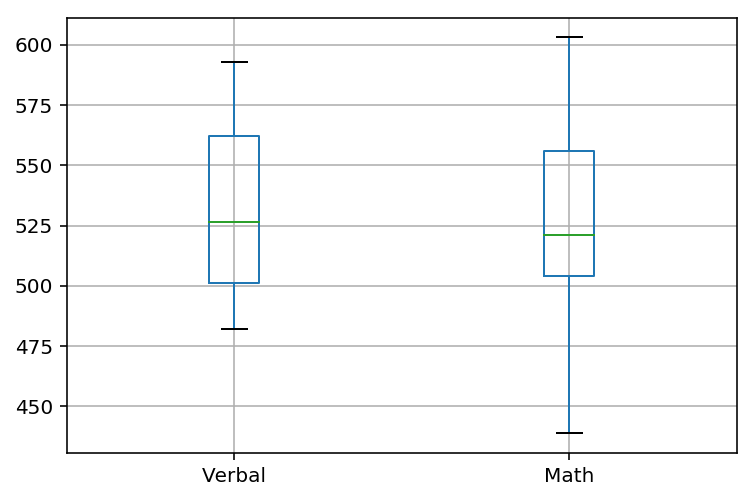

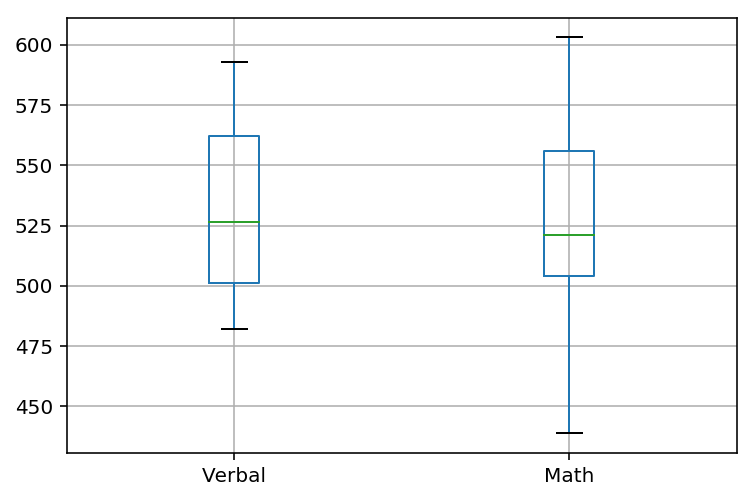

In [14]:
plt.figure
df1.boxplot(['Verbal','Math'])
plt.show()


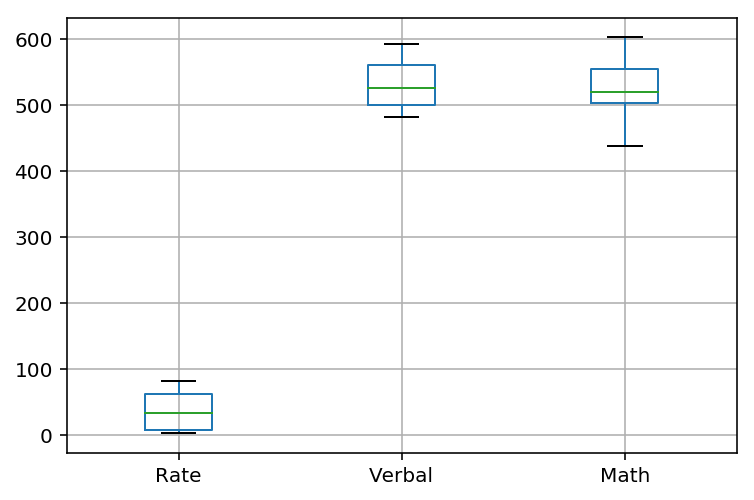

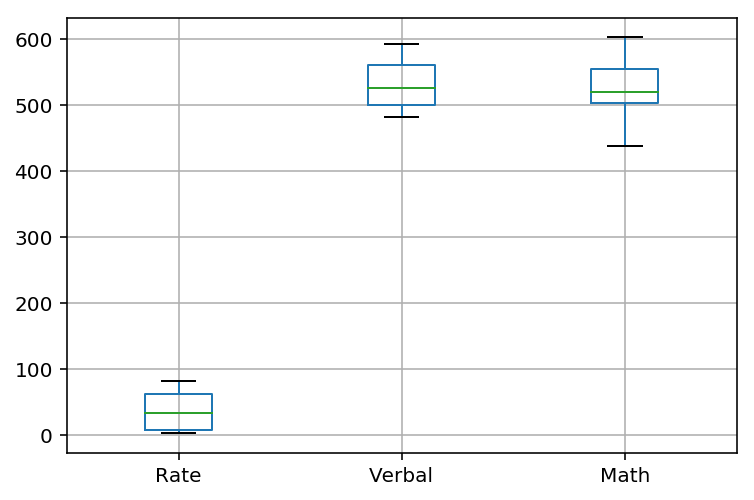

In [15]:
plt.figure
df1.boxplot()
plt.show()

# plotting the rate boxplot skews the overall plot layout, reducing the precision of the overall plot

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [16]:
df1.head(20)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64
count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64


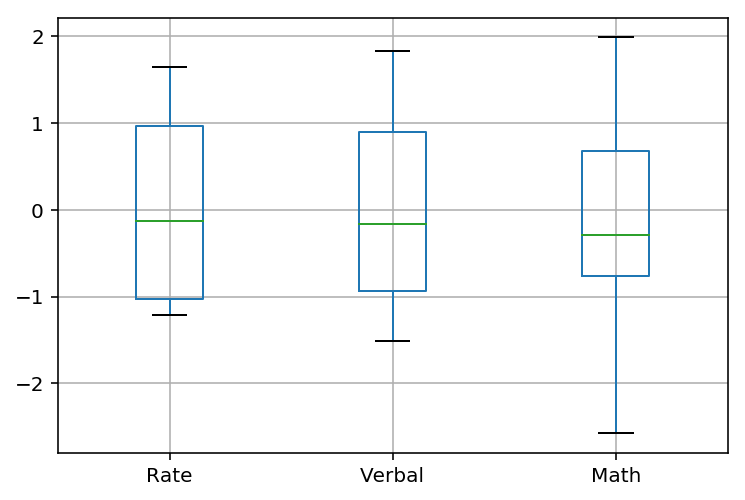

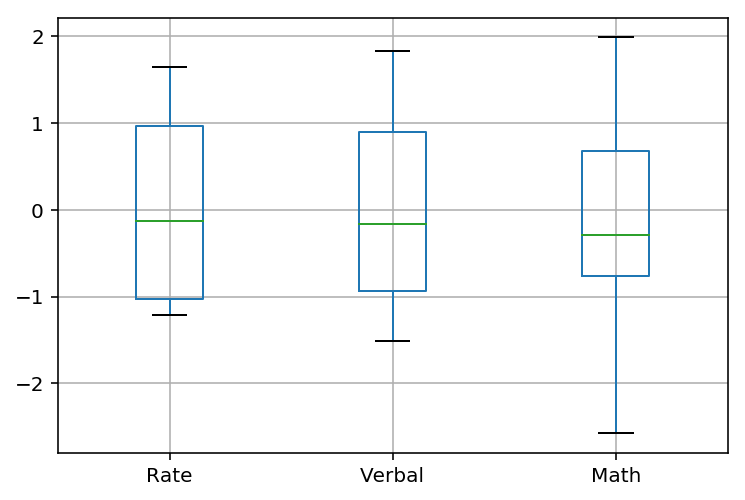

In [17]:
df3=pd.read_csv('sat_scores.csv')
# normalise the variables for the rate, verbal and math based on their respective mean and standard deviation values
desc_rate=df3['Rate'].describe()
print(desc_rate)
df3['Rate']=(df3['Rate']-desc_rate[1])/desc_rate[2]
# desc_math=df1['Math'].describe()
desc_math=df3['Math'].describe()
df3['Math']=(df3['Math']-desc_math[1])/desc_math[2]
# desc_verbal=df1['Verbal'].describe()
desc_rate=df3['Verbal'].describe()
df3['Verbal']=(df3['Verbal']-desc_rate[1])/desc_rate[2]

plt.figure
df3.boxplot()
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
df1.columns


Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64
count     24.000000
mean     564.041667
std       16.624966
min      534.000000
25%      550.750000
50%      563.000000
75%      577.000000
max      593.000000
Name: Verbal, dtype: float64
count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64
count     24.000000
mean     564.041667
std       16.624966
min      534.000000
25%      550.750000
50%      563.000000
75%      577.000000
max      593.000000
Name: Verbal, dtype: float64


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


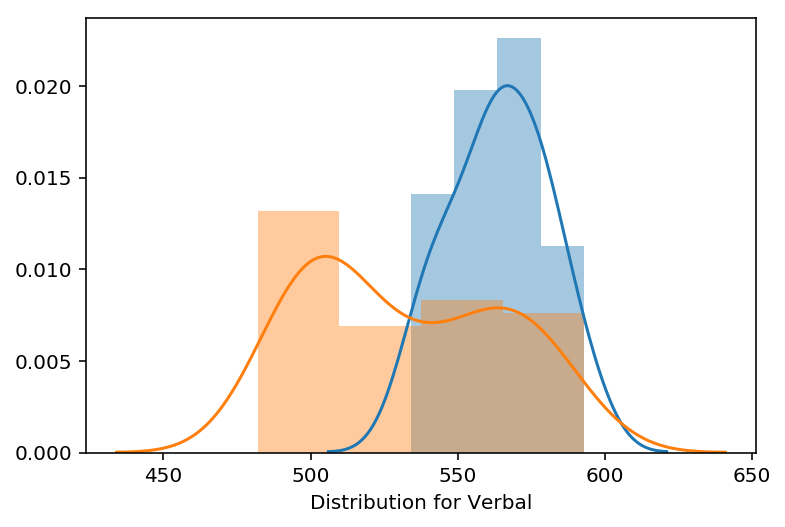

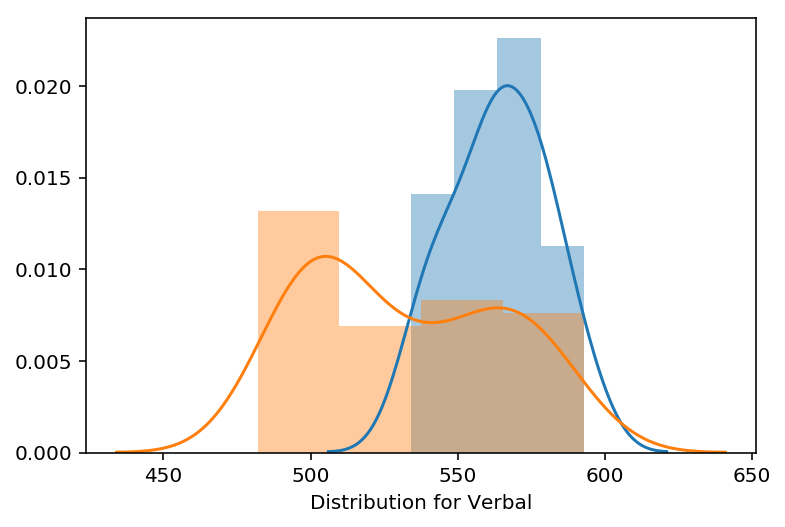

In [19]:
mean_verbal=df1['Verbal'].mean()
print(df1['Verbal'].describe())

verbal_1=df1[df1['Verbal']>mean_verbal]['Verbal']
print(verbal_1.describe())

fig=plt.figure()
ax=fig.gca()
plot1=sns.distplot(verbal_1,ax=ax)
sns.distplot(df1['Verbal'],ax=ax)
plot1.set_xlabel('Distribution for Verbal')
plt.show()

# the overall verbal SAT score is more a bimodal distribution as there are two peaks. The distribution is more spread out which can be seen from the graph plot and the standard deviation.
# the distribution for verbal SAT score higher than mean is more a normal distribution with a less spread out distribution.

In [20]:
state_1=df1[df1['Verbal']>mean_verbal]['State']
print('total number of states that is higher than the mean:',state_1.value_counts().sum())

total number of states that is higher than the mean: 24
total number of states that is higher than the mean: 24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
median_verbal=df1['Verbal'].median

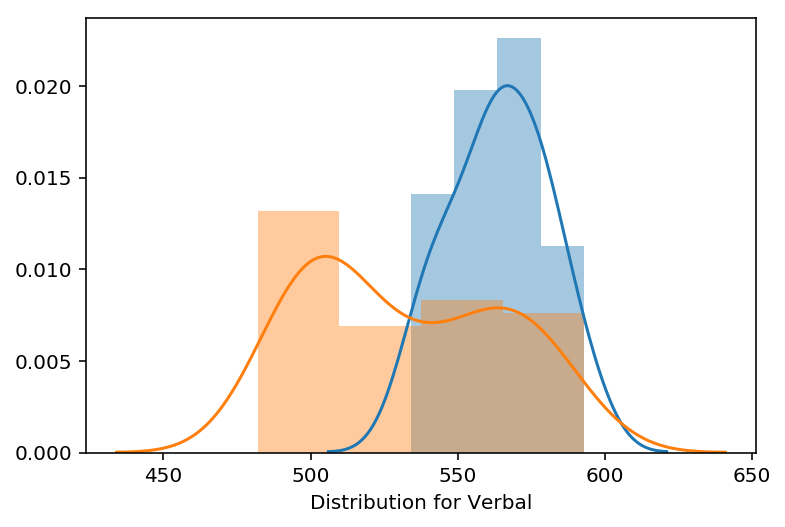

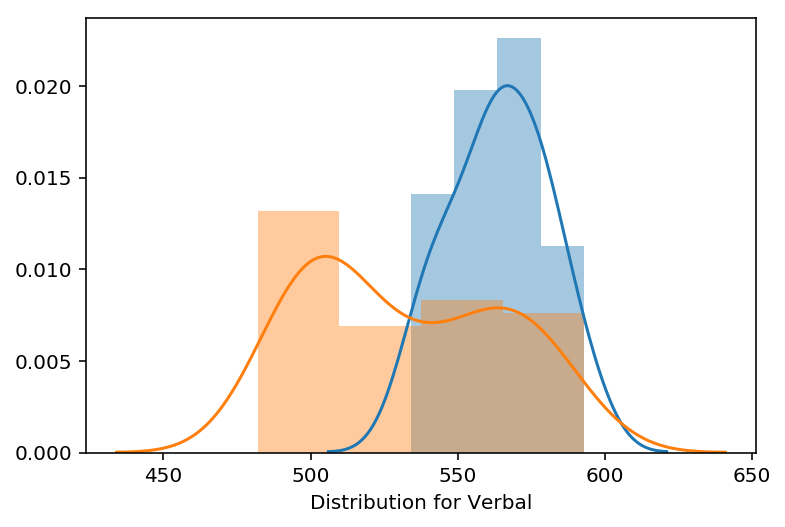

In [22]:
median_verbal=df1['Verbal'].median()

verbal_2=df1[df1['Verbal']>median_verbal]['Verbal']

fig=plt.figure()
ax=fig.gca()
plot1=sns.distplot(verbal_1,ax=ax)
sns.distplot(df2['Verbal'],ax=ax)
plot1.set_xlabel('Distribution for Verbal')
plt.show()

# there is not much difference between the verbal scores of filtered from higher than mean or median. Both mean and median for the overall distribution has always been relatively close to one another. Hence, the verbal scores filtered for mean and median should be similar.

In [23]:
state_2=df1[df1['Verbal']>median_verbal]['State']
print('total number of states that is higher than the median:',state_2.value_counts().sum())

total number of states that is higher than the median: 26
total number of states that is higher than the median: 26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
df2['Verbal-Math']=df2['Verbal']-df2['Math']
df2.T

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
State,CT,NJ,MA,NY,NH,RI,PA,VT,ME,VA,...,MO,LA,WI,AR,UT,IA,SD,ND,MS,All
Rate,82,81,79,77,72,71,71,69,69,68,...,8,7,6,6,5,5,4,4,4,45
Verbal,509,499,511,495,520,501,500,511,506,510,...,577,564,584,562,575,593,577,592,566,506
Math,510,513,515,505,516,499,499,506,500,501,...,577,562,596,550,570,603,582,599,551,514
Verbal-Math,-1,-14,-4,-10,4,2,1,5,6,9,...,0,2,-12,12,5,-10,-5,-7,15,-8


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
State,CT,NJ,MA,NY,NH,RI,PA,VT,ME,VA,...,MO,LA,WI,AR,UT,IA,SD,ND,MS,All
Rate,82,81,79,77,72,71,71,69,69,68,...,8,7,6,6,5,5,4,4,4,45
Verbal,509,499,511,495,520,501,500,511,506,510,...,577,564,584,562,575,593,577,592,566,506
Math,510,513,515,505,516,499,499,506,500,501,...,577,562,596,550,570,603,582,599,551,514
Verbal-Math,-1,-14,-4,-10,4,2,1,5,6,9,...,0,2,-12,12,5,-10,-5,-7,15,-8


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [25]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
State,CT,NJ,MA,NY,NH,RI,PA,VT,ME,VA,...,MO,LA,WI,AR,UT,IA,SD,ND,MS,All
Rate,82,81,79,77,72,71,71,69,69,68,...,8,7,6,6,5,5,4,4,4,45
Verbal,509,499,511,495,520,501,500,511,506,510,...,577,564,584,562,575,593,577,592,566,506
Math,510,513,515,505,516,499,499,506,500,501,...,577,562,596,550,570,603,582,599,551,514
Verbal-Math,-1,-14,-4,-10,4,2,1,5,6,9,...,0,2,-12,12,5,-10,-5,-7,15,-8


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
State,CT,NJ,MA,NY,NH,RI,PA,VT,ME,VA,...,MO,LA,WI,AR,UT,IA,SD,ND,MS,All
Rate,82,81,79,77,72,71,71,69,69,68,...,8,7,6,6,5,5,4,4,4,45
Verbal,509,499,511,495,520,501,500,511,506,510,...,577,564,584,562,575,593,577,592,566,506
Math,510,513,515,505,516,499,499,506,500,501,...,577,562,596,550,570,603,582,599,551,514
Verbal-Math,-1,-14,-4,-10,4,2,1,5,6,9,...,0,2,-12,12,5,-10,-5,-7,15,-8


In [26]:
Top_Verbal=df2.sort_values('Verbal-Math',ascending=False).head(10).reset_index(drop=True)

print('the top 3 states for Verbal-Math is {},{},{}'.format(Top_Verbal['State'][0],Top_Verbal['State'][1],Top_Verbal['State'][2]))

Top_Maths=df2.sort_values('Verbal-Math',ascending=True).head(10).reset_index(drop=True)
print('the top 3 states for Verbal-Math is {},{},{}'.format(Top_Maths['State'][0],Top_Maths['State'][1],Top_Maths['State'][2]))

the top 3 states for Verbal-Math is OH,MS,WV
the top 3 states for Verbal-Math is HI,CA,NJ
the top 3 states for Verbal-Math is OH,MS,WV
the top 3 states for Verbal-Math is HI,CA,NJ


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [27]:
df4=df1.drop(columns=['State'])
df4.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [28]:
df1.describe()
# count= total number of variables per column
# mean= total sum of variables/count
# std= measures the spread of the data per column
# min= the smallest magnitude of the variable per column
# 25%= 25% percentile
# 50%= median
# 75%= 75% percentile
# max= the largest magnitude of the variable per column

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
df4.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


In [30]:
df4.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


# Explanation

1. Describe how the covariance matrix is different from the correlation matrix.

Covariance matrix has a range of values within - \infty and + \infty while Correlation matrix has a range of values within -1 and +1

2. What is the process to convert the covariance into the correlation?

rxy=sxy/sxsy

rxy= sample correlation between samples x and y
sxy= sample covariance between samples x and y
sx=  sample standard deviation between samples x
sy=  sample standard deviation between samples y

3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

a) Covariance is affected by the units in which it's measured, whereas correlation has no units


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [31]:
drug_used='drug-use-by-age.csv'
drug=pd.read_csv(drug_used)
drug.head()
# the data require cleaning because there are columns which it is suppose to be float or integer but is showing objects
# there are variables missing

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [32]:
new_title=[]
for col in drug.columns:
    new_title.append(col.replace('-','_').replace('hallucinogen','halluc').replace('frequency','median').replace('tranquilizer','tranq').replace('oxycontin','oxy').replace('pain_releiver','painrelief'))
drug.columns=new_title


In [33]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                  17 non-null object
n                    17 non-null int64
alcohol_use          17 non-null float64
alcohol_median       17 non-null float64
marijuana_use        17 non-null float64
marijuana_median     17 non-null float64
cocaine_use          17 non-null float64
cocaine_median       17 non-null object
crack_use            17 non-null float64
crack_median         17 non-null object
heroin_use           17 non-null float64
heroin_median        17 non-null object
halluc_use           17 non-null float64
halluc_median        17 non-null float64
inhalant_use         17 non-null float64
inhalant_median      17 non-null object
painrelief_use       17 non-null float64
painrelief_median    17 non-null float64
oxy_use              17 non-null float64
oxy_median           17 non-null object
tranq_use            17 non-null float64
tranq_median         17 non-null float64
sti

In [34]:
# function to change '-' to NaN and column type to float

def func1(col):
    drug.loc[drug[drug[col]=='-'].index,col]=np.nan
    drug[col]=drug[col].astype(float)
    

In [35]:
unclean_col=['cocaine_median','crack_median','heroin_median','inhalant_median','oxy_median','meth_median']

for item in unclean_col:
    func1(item)
    
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                  17 non-null object
n                    17 non-null int64
alcohol_use          17 non-null float64
alcohol_median       17 non-null float64
marijuana_use        17 non-null float64
marijuana_median     17 non-null float64
cocaine_use          17 non-null float64
cocaine_median       16 non-null float64
crack_use            17 non-null float64
crack_median         14 non-null float64
heroin_use           17 non-null float64
heroin_median        16 non-null float64
halluc_use           17 non-null float64
halluc_median        17 non-null float64
inhalant_use         17 non-null float64
inhalant_median      16 non-null float64
painrelief_use       17 non-null float64
painrelief_median    17 non-null float64
oxy_use              17 non-null float64
oxy_median           16 non-null float64
tranq_use            17 non-null float64
tranq_median         17 non-null float6

alcohol-use: Percentage of those in an age group who used alcohol in the past 12 months

alcohol-frequency: Median number of times a user in an age group used alcohol in the past 12 months

marijuana-use: Percentage of those in an age group who used marijuana in the past 12 months

marijuana-frequency: Median number of times a user in an age group used marijuana in the past 12 months

cocaine-use: Percentage of those in an age group who used cocaine in the past 12 months

cocaine-frequency: Median number of times a user in an age group used cocaine in the past 12 months

crack-use: Percentage of those in an age group who used crack in the past 12 months

crack-frequency:	Median number of times a user in an age group used crack in the past 12 months

heroin-use:	Percentage of those in an age group who used heroin in the past 12 months

heroin-frequency:	Median number of times a user in an age group used heroin in the past 12 months

hallucinogen-use:	Percentage of those in an age group who used hallucinogens in the past 12 months

hallucinogen-frequency:	Median number of times a user in an age group used hallucinogens in the past 12 months

inhalant-use: Percentage of those in an age group who used inhalants in the past 12 months

inhalant-frequency:	Median number of times a user in an age group used inhalants in the past 12 months

pain-releiver-use:	Percentage of those in an age group who used pain relievers in the past 12 months

pain-releiver-frequency:	Median number of times a user in an age group used pain relievers in the past 12 months

oxycontin-use:	Percentage of those in an age group who used oxycontin in the past 12 months

oxycontin-frequency:	Median number of times a user in an age group used oxycontin in the past 12 months

tranquilizer-use:	Percentage of those in an age group who used tranquilizer in the past 12 months

tranquilizer-frequency:	Median number of times a user in an age group used tranquilizer in the past 12 months

stimulant-use:	Percentage of those in an age group who used stimulants in the past 12 months

stimulant-frequency:	Median number of times a user in an age group used stimulants in the past 12 months

meth-use:	Percentage of those in an age group who used meth in the past 12 months

meth-frequency:	Median number of times a user in an age group used meth in the past 12 months

sedative-use:	Percentage of those in an age group who used sedatives in the past 12 months

sedative-frequency:	Median number of times a user in an age group used sedatives in the past 12 months

In [36]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                  17 non-null object
n                    17 non-null int64
alcohol_use          17 non-null float64
alcohol_median       17 non-null float64
marijuana_use        17 non-null float64
marijuana_median     17 non-null float64
cocaine_use          17 non-null float64
cocaine_median       16 non-null float64
crack_use            17 non-null float64
crack_median         14 non-null float64
heroin_use           17 non-null float64
heroin_median        16 non-null float64
halluc_use           17 non-null float64
halluc_median        17 non-null float64
inhalant_use         17 non-null float64
inhalant_median      16 non-null float64
painrelief_use       17 non-null float64
painrelief_median    17 non-null float64
oxy_use              17 non-null float64
oxy_median           16 non-null float64
tranq_use            17 non-null float64
tranq_median         17 non-null float6

In [37]:
#creating a function to a filtered dataframe
drug.columns
def func2(col,drug_median):
    for item in col:
        drug_median[item]=drug[item]

def func3(col,drug_prop):
    for item in col:
        if item in ['age','n']:
            drug_prop[item]=drug[item]
        else:
            drug_prop[item]=drug.n*drug[item]/100
      
        

In [38]:
# creating a new dataframe with just median values
median_list=['age','n','alcohol_median','marijuana_median','cocaine_median','crack_median','heroin_median','halluc_median','inhalant_median','painrelief_median','oxy_median','tranq_median','stimulant_median','meth_median','sedative_median']
drug_median=pd.DataFrame()
func2(median_list,drug_median)


In [39]:
# creating a new dataframe with just percentages
usage_list=['age','n','alcohol_use','marijuana_use','cocaine_use','crack_use','heroin_use','halluc_use','inhalant_use','painrelief_use','oxy_use','tranq_use','stimulant_use','meth_use','sedative_use']
drug_usage=pd.DataFrame()
func2(usage_list,drug_usage)
drug_usage

,age,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


,age,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [40]:
# creating a new dataframe with just proportions
drug_prop=pd.DataFrame()
func3(usage_list,drug_prop)
drug_prop

,age,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
0,12,2798,109.122,30.778,2.798,0.000,2.798,5.596,44.768,55.960,2.798,5.596,5.596,0.000,5.596
1,13,2757,234.345,93.738,2.757,0.000,0.000,16.542,68.925,66.168,2.757,8.271,8.271,2.757,2.757
2,14,2792,505.352,242.904,2.792,0.000,2.792,44.672,72.592,108.888,11.168,25.128,22.336,2.792,5.584
3,15,2956,863.152,428.620,14.780,2.956,5.912,62.076,73.900,162.580,23.648,59.120,44.340,8.868,11.824
4,16,3058,1226.258,688.050,30.580,0.000,3.058,103.972,91.740,189.596,33.638,73.392,55.044,9.174,6.116
5,17,3038,1497.734,850.640,60.760,3.038,3.038,145.824,60.760,258.230,42.532,106.330,85.064,18.228,15.190
6,18,2469,1449.303,832.053,79.008,9.876,9.876,172.830,44.442,227.148,41.973,120.981,74.070,12.345,9.876
7,19,2223,1436.058,742.482,91.143,11.115,11.115,191.178,31.122,208.962,33.345,93.366,73.359,8.892,6.669
8,20,2271,1582.887,772.140,111.279,13.626,20.439,168.054,34.065,227.100,38.607,122.634,90.840,20.439,11.355
9,21,2354,1958.528,776.820,112.992,11.770,14.124,148.302,32.956,211.860,30.602,91.806,96.514,14.124,7.062


,age,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
0,12,2798,109.122,30.778,2.798,0.000,2.798,5.596,44.768,55.960,2.798,5.596,5.596,0.000,5.596
1,13,2757,234.345,93.738,2.757,0.000,0.000,16.542,68.925,66.168,2.757,8.271,8.271,2.757,2.757
2,14,2792,505.352,242.904,2.792,0.000,2.792,44.672,72.592,108.888,11.168,25.128,22.336,2.792,5.584
3,15,2956,863.152,428.620,14.780,2.956,5.912,62.076,73.900,162.580,23.648,59.120,44.340,8.868,11.824
4,16,3058,1226.258,688.050,30.580,0.000,3.058,103.972,91.740,189.596,33.638,73.392,55.044,9.174,6.116
5,17,3038,1497.734,850.640,60.760,3.038,3.038,145.824,60.760,258.230,42.532,106.330,85.064,18.228,15.190
6,18,2469,1449.303,832.053,79.008,9.876,9.876,172.830,44.442,227.148,41.973,120.981,74.070,12.345,9.876
7,19,2223,1436.058,742.482,91.143,11.115,11.115,191.178,31.122,208.962,33.345,93.366,73.359,8.892,6.669
8,20,2271,1582.887,772.140,111.279,13.626,20.439,168.054,34.065,227.100,38.607,122.634,90.840,20.439,11.355
9,21,2354,1958.528,776.820,112.992,11.770,14.124,148.302,32.956,211.860,30.602,91.806,96.514,14.124,7.062


In [41]:
# crack and alcohol are common drugs abused together
drug_prop.corr()

,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
n,1.000000,0.855600,0.362886,0.434800,0.793218,0.290301,0.012436,-0.128622,0.531282,0.248158,0.483142,0.188979,0.393969,0.635204
alcohol_use,0.855600,1.000000,0.637024,0.746031,0.955398,0.564629,0.331720,-0.412623,0.738874,0.531757,0.770409,0.492790,0.675077,0.645557
marijuana_use,0.362886,0.637024,1.000000,0.911150,0.621458,0.783811,0.913489,0.070371,0.959885,0.959291,0.948589,0.951652,0.912873,0.494689
cocaine_use,0.434800,0.746031,0.911150,1.000000,0.767836,0.907705,0.825010,-0.210607,0.934642,0.883238,0.948452,0.910864,0.921954,0.405943
crack_use,0.793218,0.955398,0.621458,0.767836,1.000000,0.579338,0.363527,-0.452688,0.714838,0.505818,0.769083,0.488941,0.657432,0.669852
heroin_use,0.290301,0.564629,0.783811,0.907705,0.579338,1.000000,0.757529,-0.116774,0.841177,0.863302,0.834955,0.876557,0.835606,0.177433
halluc_use,0.012436,0.331720,0.913489,0.825010,0.363527,0.757529,1.000000,0.127339,0.817546,0.914694,0.806545,0.943375,0.799510,0.207671
inhalant_use,-0.128622,-0.412623,0.070371,-0.210607,-0.452688,-0.116774,0.127339,1.000000,0.041062,0.095934,-0.131632,0.087404,-0.066698,-0.072904
painrelief_use,0.531282,0.738874,0.959885,0.934642,0.714838,0.841177,0.817546,0.041062,1.000000,0.932132,0.970035,0.913796,0.937304,0.555086
oxy_use,0.248158,0.531757,0.959291,0.883238,0.505818,0.863302,0.914694,0.095934,0.932132,1.000000,0.922363,0.964690,0.911696,0.363842


,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
n,1.000000,0.855600,0.362886,0.434800,0.793218,0.290301,0.012436,-0.128622,0.531282,0.248158,0.483142,0.188979,0.393969,0.635204
alcohol_use,0.855600,1.000000,0.637024,0.746031,0.955398,0.564629,0.331720,-0.412623,0.738874,0.531757,0.770409,0.492790,0.675077,0.645557
marijuana_use,0.362886,0.637024,1.000000,0.911150,0.621458,0.783811,0.913489,0.070371,0.959885,0.959291,0.948589,0.951652,0.912873,0.494689
cocaine_use,0.434800,0.746031,0.911150,1.000000,0.767836,0.907705,0.825010,-0.210607,0.934642,0.883238,0.948452,0.910864,0.921954,0.405943
crack_use,0.793218,0.955398,0.621458,0.767836,1.000000,0.579338,0.363527,-0.452688,0.714838,0.505818,0.769083,0.488941,0.657432,0.669852
heroin_use,0.290301,0.564629,0.783811,0.907705,0.579338,1.000000,0.757529,-0.116774,0.841177,0.863302,0.834955,0.876557,0.835606,0.177433
halluc_use,0.012436,0.331720,0.913489,0.825010,0.363527,0.757529,1.000000,0.127339,0.817546,0.914694,0.806545,0.943375,0.799510,0.207671
inhalant_use,-0.128622,-0.412623,0.070371,-0.210607,-0.452688,-0.116774,0.127339,1.000000,0.041062,0.095934,-0.131632,0.087404,-0.066698,-0.072904
painrelief_use,0.531282,0.738874,0.959885,0.934642,0.714838,0.841177,0.817546,0.041062,1.000000,0.932132,0.970035,0.913796,0.937304,0.555086
oxy_use,0.248158,0.531757,0.959291,0.883238,0.505818,0.863302,0.914694,0.095934,0.932132,1.000000,0.922363,0.964690,0.911696,0.363842


In [42]:
drug_median.corr()

,n,alcohol_median,marijuana_median,cocaine_median,crack_median,heroin_median,halluc_median,inhalant_median,painrelief_median,oxy_median,tranq_median,stimulant_median,meth_median,sedative_median
n,1.000000,0.313431,0.135597,0.365386,0.548114,0.615534,0.008743,0.190410,-0.112076,-0.024438,-0.102301,-0.114792,0.485909,0.256701
alcohol_median,0.313431,1.000000,0.818769,0.391981,0.333935,0.381874,-0.174622,-0.305296,0.007087,0.119852,-0.415026,0.260304,0.253725,0.201423
marijuana_median,0.135597,0.818769,1.000000,0.250348,0.113860,0.277175,-0.380430,-0.598028,-0.285292,0.040880,-0.591449,-0.069454,0.317099,0.048777
cocaine_median,0.365386,0.391981,0.250348,1.000000,0.875558,0.149018,0.529790,0.369098,-0.107033,-0.236768,-0.144951,0.817772,0.172758,0.773808
crack_median,0.548114,0.333935,0.113860,0.875558,1.000000,0.298192,0.737179,0.665838,-0.001609,-0.195650,-0.233501,0.903993,0.261224,0.611218
heroin_median,0.615534,0.381874,0.277175,0.149018,0.298192,1.000000,-0.205455,0.048409,-0.041496,0.039502,-0.202417,0.204941,0.873618,-0.199142
halluc_median,0.008743,-0.174622,-0.380430,0.529790,0.737179,-0.205455,1.000000,0.846213,0.547363,0.032624,0.705734,-0.103980,-0.084470,0.533095
inhalant_median,0.190410,-0.305296,-0.598028,0.369098,0.665838,0.048409,0.846213,1.000000,0.587035,0.226635,0.764857,0.083121,0.045934,0.380819
painrelief_median,-0.112076,0.007087,-0.285292,-0.107033,-0.001609,-0.041496,0.547363,0.587035,1.000000,0.561735,0.699282,0.324717,0.037693,-0.045213
oxy_median,-0.024438,0.119852,0.040880,-0.236768,-0.195650,0.039502,0.032624,0.226635,0.561735,1.000000,0.412133,-0.228278,-0.053704,-0.131597


,n,alcohol_median,marijuana_median,cocaine_median,crack_median,heroin_median,halluc_median,inhalant_median,painrelief_median,oxy_median,tranq_median,stimulant_median,meth_median,sedative_median
n,1.000000,0.313431,0.135597,0.365386,0.548114,0.615534,0.008743,0.190410,-0.112076,-0.024438,-0.102301,-0.114792,0.485909,0.256701
alcohol_median,0.313431,1.000000,0.818769,0.391981,0.333935,0.381874,-0.174622,-0.305296,0.007087,0.119852,-0.415026,0.260304,0.253725,0.201423
marijuana_median,0.135597,0.818769,1.000000,0.250348,0.113860,0.277175,-0.380430,-0.598028,-0.285292,0.040880,-0.591449,-0.069454,0.317099,0.048777
cocaine_median,0.365386,0.391981,0.250348,1.000000,0.875558,0.149018,0.529790,0.369098,-0.107033,-0.236768,-0.144951,0.817772,0.172758,0.773808
crack_median,0.548114,0.333935,0.113860,0.875558,1.000000,0.298192,0.737179,0.665838,-0.001609,-0.195650,-0.233501,0.903993,0.261224,0.611218
heroin_median,0.615534,0.381874,0.277175,0.149018,0.298192,1.000000,-0.205455,0.048409,-0.041496,0.039502,-0.202417,0.204941,0.873618,-0.199142
halluc_median,0.008743,-0.174622,-0.380430,0.529790,0.737179,-0.205455,1.000000,0.846213,0.547363,0.032624,0.705734,-0.103980,-0.084470,0.533095
inhalant_median,0.190410,-0.305296,-0.598028,0.369098,0.665838,0.048409,0.846213,1.000000,0.587035,0.226635,0.764857,0.083121,0.045934,0.380819
painrelief_median,-0.112076,0.007087,-0.285292,-0.107033,-0.001609,-0.041496,0.547363,0.587035,1.000000,0.561735,0.699282,0.324717,0.037693,-0.045213
oxy_median,-0.024438,0.119852,0.040880,-0.236768,-0.195650,0.039502,0.032624,0.226635,0.561735,1.000000,0.412133,-0.228278,-0.053704,-0.131597


In [43]:
drug_prop.describe()

,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,1903.995294,590.524176,70.279765,10.373529,11.506118,100.271529,40.959471,200.627471,29.173353,89.698353,58.876882,12.226471,8.977176
std,1297.890426,1425.463192,375.118426,62.956954,10.434853,13.276774,78.418319,25.933699,120.022539,20.666910,60.415710,45.182499,9.042363,4.979433
min,2223.000000,109.122000,29.376000,0.000000,0.000000,0.000000,2.448000,0.000000,14.688000,0.000000,4.896000,0.000000,0.000000,0.000000
25%,2469.000000,1206.864000,286.379000,14.780000,0.000000,3.038000,44.346000,22.173000,108.888000,15.692000,54.922000,22.336000,7.846000,6.116000
50%,2798.000000,1497.734000,688.050000,60.760000,10.512000,7.391000,84.096000,36.728000,208.962000,30.602000,93.366000,55.044000,11.456000,9.182000
75%,3058.000000,2219.600000,776.820000,110.865000,14.320000,14.124000,168.054000,60.760000,227.148000,38.607000,120.981000,85.064000,15.768000,11.355000
max,7391.000000,5543.250000,1336.788000,211.815000,36.955000,51.777000,244.764000,91.740000,470.700000,80.019000,207.108000,169.452000,32.137000,22.173000


,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,1903.995294,590.524176,70.279765,10.373529,11.506118,100.271529,40.959471,200.627471,29.173353,89.698353,58.876882,12.226471,8.977176
std,1297.890426,1425.463192,375.118426,62.956954,10.434853,13.276774,78.418319,25.933699,120.022539,20.666910,60.415710,45.182499,9.042363,4.979433
min,2223.000000,109.122000,29.376000,0.000000,0.000000,0.000000,2.448000,0.000000,14.688000,0.000000,4.896000,0.000000,0.000000,0.000000
25%,2469.000000,1206.864000,286.379000,14.780000,0.000000,3.038000,44.346000,22.173000,108.888000,15.692000,54.922000,22.336000,7.846000,6.116000
50%,2798.000000,1497.734000,688.050000,60.760000,10.512000,7.391000,84.096000,36.728000,208.962000,30.602000,93.366000,55.044000,11.456000,9.182000
75%,3058.000000,2219.600000,776.820000,110.865000,14.320000,14.124000,168.054000,60.760000,227.148000,38.607000,120.981000,85.064000,15.768000,11.355000
max,7391.000000,5543.250000,1336.788000,211.815000,36.955000,51.777000,244.764000,91.740000,470.700000,80.019000,207.108000,169.452000,32.137000,22.173000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [44]:
# rounding up to whole numbers
drug_prop=round(drug_prop)
drug_prop

,age,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
0,12,2798,109.0,31.0,3.0,0.0,3.0,6.0,45.0,56.0,3.0,6.0,6.0,0.0,6.0
1,13,2757,234.0,94.0,3.0,0.0,0.0,17.0,69.0,66.0,3.0,8.0,8.0,3.0,3.0
2,14,2792,505.0,243.0,3.0,0.0,3.0,45.0,73.0,109.0,11.0,25.0,22.0,3.0,6.0
3,15,2956,863.0,429.0,15.0,3.0,6.0,62.0,74.0,163.0,24.0,59.0,44.0,9.0,12.0
4,16,3058,1226.0,688.0,31.0,0.0,3.0,104.0,92.0,190.0,34.0,73.0,55.0,9.0,6.0
5,17,3038,1498.0,851.0,61.0,3.0,3.0,146.0,61.0,258.0,43.0,106.0,85.0,18.0,15.0
6,18,2469,1449.0,832.0,79.0,10.0,10.0,173.0,44.0,227.0,42.0,121.0,74.0,12.0,10.0
7,19,2223,1436.0,742.0,91.0,11.0,11.0,191.0,31.0,209.0,33.0,93.0,73.0,9.0,7.0
8,20,2271,1583.0,772.0,111.0,14.0,20.0,168.0,34.0,227.0,39.0,123.0,91.0,20.0,11.0
9,21,2354,1959.0,777.0,113.0,12.0,14.0,148.0,33.0,212.0,31.0,92.0,97.0,14.0,7.0


,age,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,halluc_use,inhalant_use,painrelief_use,oxy_use,tranq_use,stimulant_use,meth_use,sedative_use
0,12,2798,109.0,31.0,3.0,0.0,3.0,6.0,45.0,56.0,3.0,6.0,6.0,0.0,6.0
1,13,2757,234.0,94.0,3.0,0.0,0.0,17.0,69.0,66.0,3.0,8.0,8.0,3.0,3.0
2,14,2792,505.0,243.0,3.0,0.0,3.0,45.0,73.0,109.0,11.0,25.0,22.0,3.0,6.0
3,15,2956,863.0,429.0,15.0,3.0,6.0,62.0,74.0,163.0,24.0,59.0,44.0,9.0,12.0
4,16,3058,1226.0,688.0,31.0,0.0,3.0,104.0,92.0,190.0,34.0,73.0,55.0,9.0,6.0
5,17,3038,1498.0,851.0,61.0,3.0,3.0,146.0,61.0,258.0,43.0,106.0,85.0,18.0,15.0
6,18,2469,1449.0,832.0,79.0,10.0,10.0,173.0,44.0,227.0,42.0,121.0,74.0,12.0,10.0
7,19,2223,1436.0,742.0,91.0,11.0,11.0,191.0,31.0,209.0,33.0,93.0,73.0,9.0,7.0
8,20,2271,1583.0,772.0,111.0,14.0,20.0,168.0,34.0,227.0,39.0,123.0,91.0,20.0,11.0
9,21,2354,1959.0,777.0,113.0,12.0,14.0,148.0,33.0,212.0,31.0,92.0,97.0,14.0,7.0


In [45]:
# determining the top three most consumed drug substance from all age group
# alcohol, marijuana, pain relief
drug_prop.iloc[:,2:].sum(axis=0).sort_values(ascending=False)

alcohol_use       32367.0
marijuana_use     10040.0
painrelief_use     3411.0
halluc_use         1706.0
tranq_use          1523.0
cocaine_use        1196.0
stimulant_use       999.0
inhalant_use        697.0
oxy_use             499.0
meth_use            207.0
heroin_use          195.0
crack_use           178.0
sedative_use        153.0
dtype: float64

alcohol_use       32367.0
marijuana_use     10040.0
painrelief_use     3411.0
halluc_use         1706.0
tranq_use          1523.0
cocaine_use        1196.0
stimulant_use       999.0
inhalant_use        697.0
oxy_use             499.0
meth_use            207.0
heroin_use          195.0
crack_use           178.0
sedative_use        153.0
dtype: float64

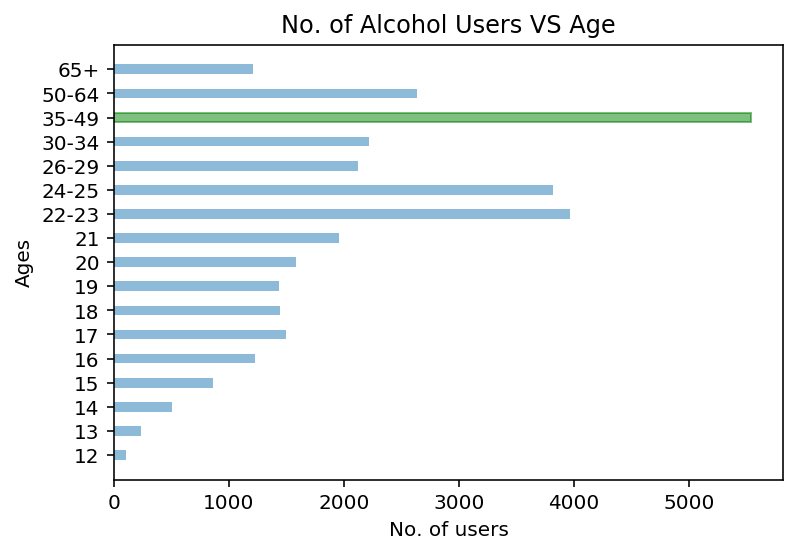

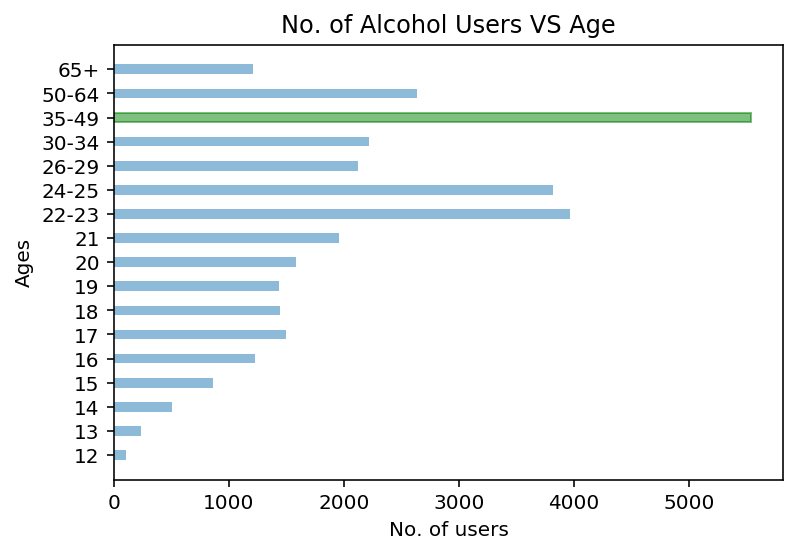

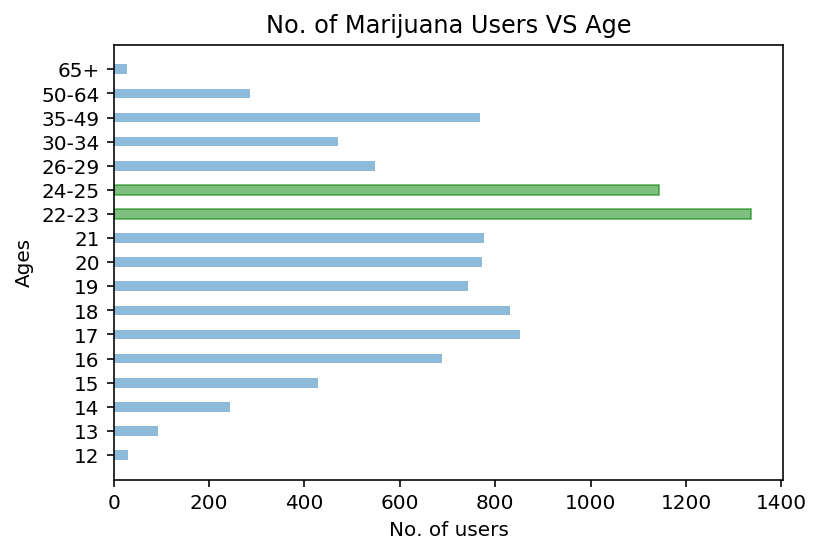

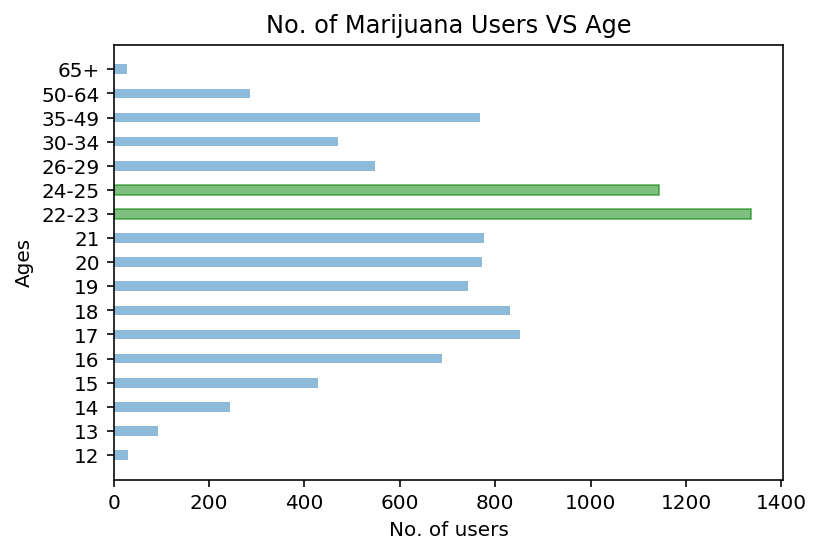

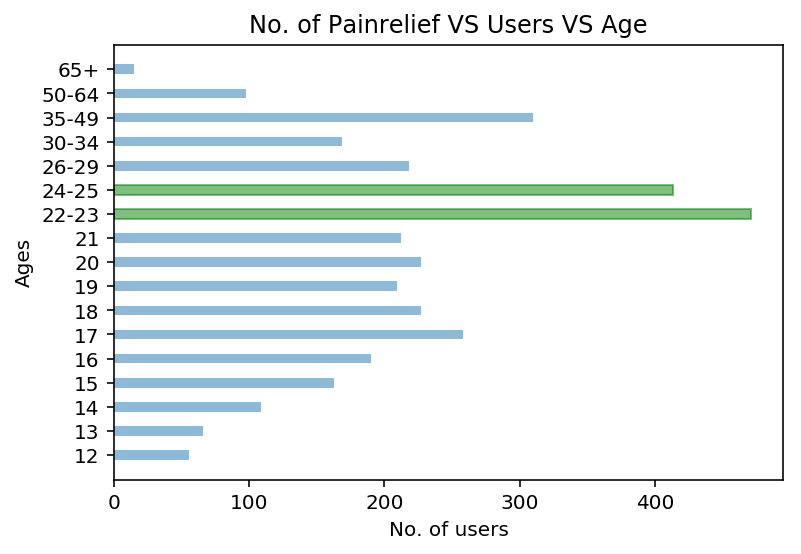

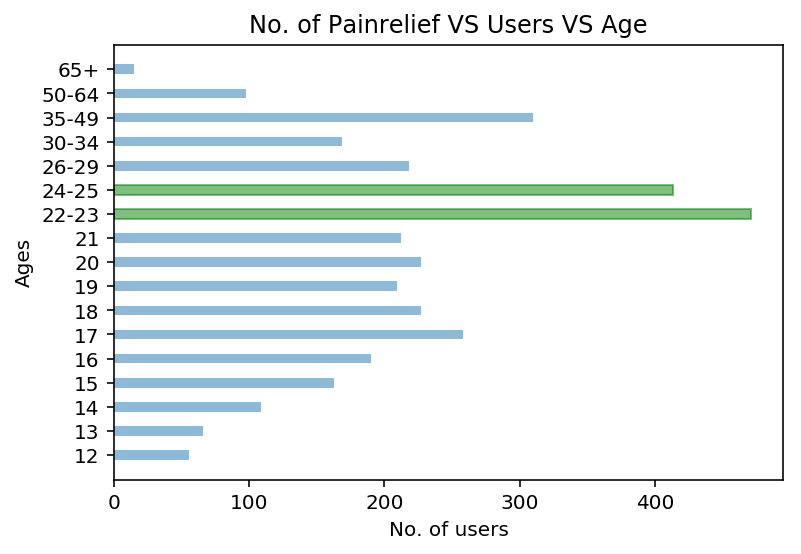

In [46]:
# finding out the age group that contributes the most users to the top 3 drugs

y_ticks=drug_prop['age']
y_space=range(0,len(drug_prop['alcohol_use'])*2,2)

plt.figure()
plot1=plt.barh(y_space,drug_prop['alcohol_use'],align='center', alpha=0.5)
plt.yticks(y_space, y_ticks)
plot1[14].set_color('g')
plt.title('No. of Alcohol Users VS Age')
plt.xlabel('No. of users')
plt.ylabel('Ages')
plt.show()

plt.figure
plot2=plt.barh(y_space,round(drug_prop['marijuana_use']),align='center', alpha=0.5)
plt.yticks(y_space, y_ticks)
plot2[10].set_color('g')
plot2[11].set_color('g')
plt.title('No. of Marijuana Users VS Age')
plt.xlabel('No. of users')
plt.ylabel('Ages')
plt.show()

plt.figure
plot3=plt.barh(y_space,drug_prop['painrelief_use'],align='center', alpha=0.5)
plt.yticks(y_space, y_ticks)
plot3[11].set_color('g')
plot3[10].set_color('g')
plt.title('No. of Painrelief VS Users VS Age')
plt.xlabel('No. of users')
plt.ylabel('Ages')
plt.show()


In [47]:
# determining the top three most drugs with the highest median consumption from all age group
# heroin, marijuana, alcohol
drug_median.iloc[:,2:].sum(axis=0).sort_values(ascending=False).head(4)

heroin_median       1172.5
marijuana_median     730.0
alcohol_median       567.0
meth_median          539.5
dtype: float64

heroin_median       1172.5
marijuana_median     730.0
alcohol_median       567.0
meth_median          539.5
dtype: float64

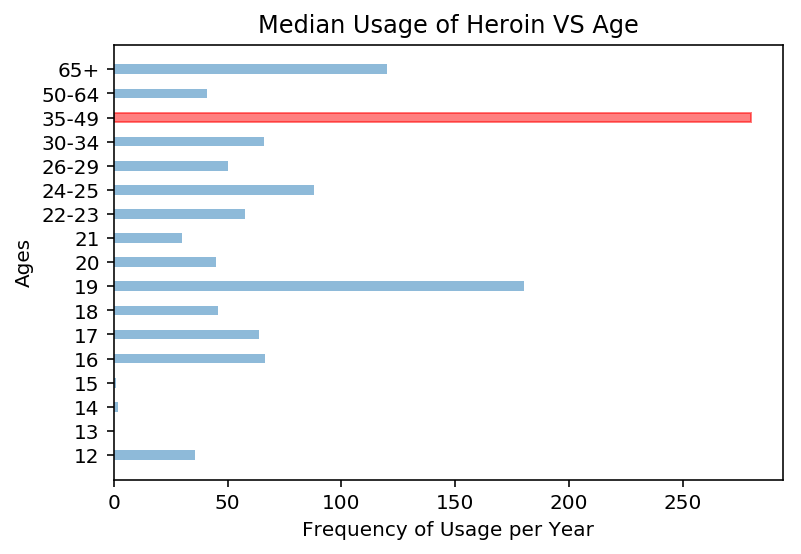

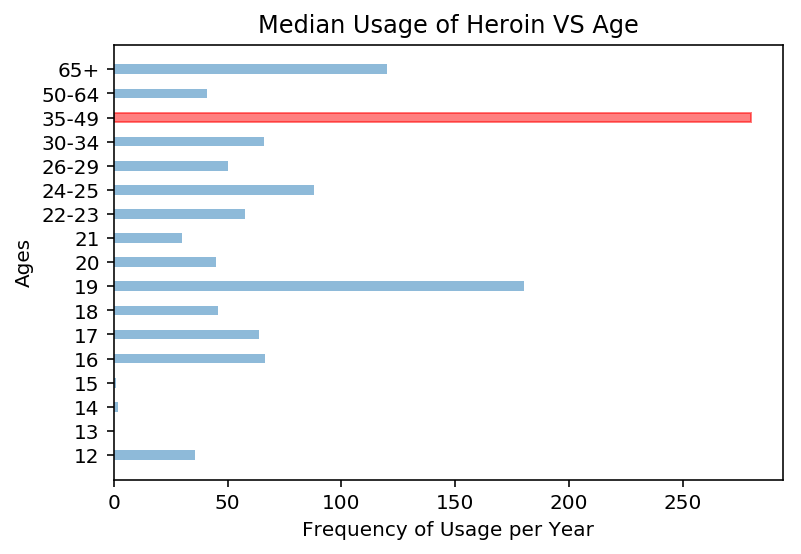

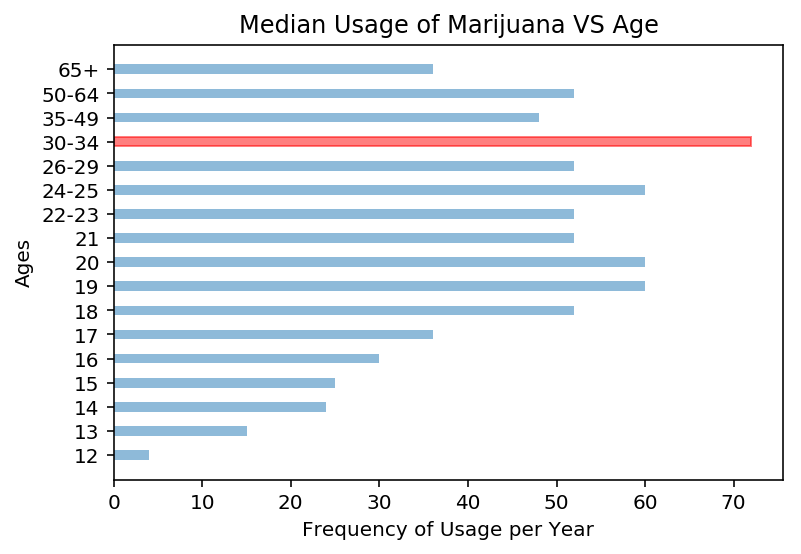

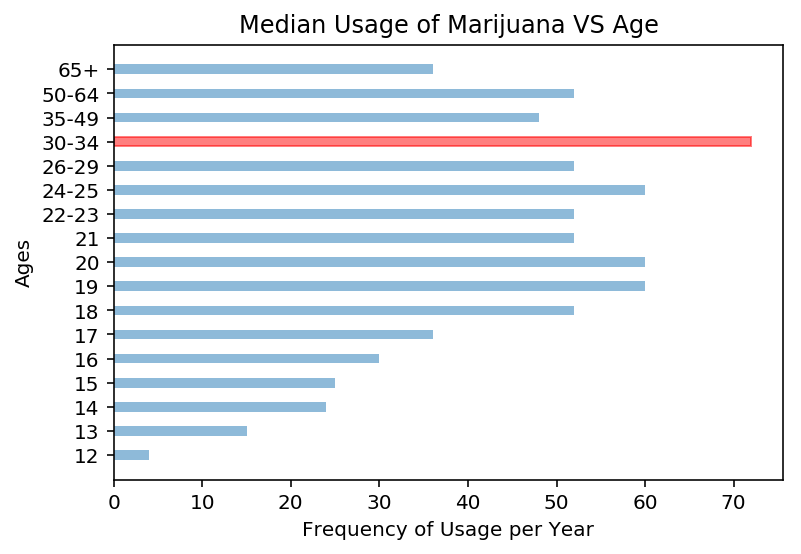

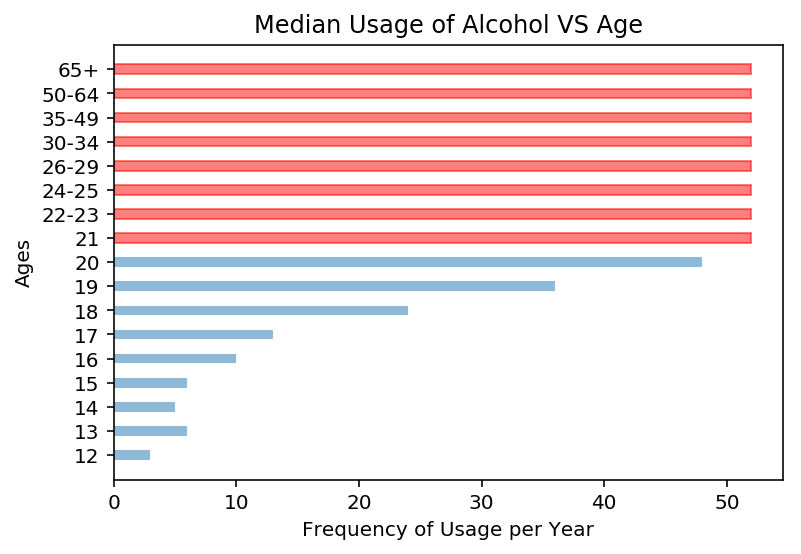

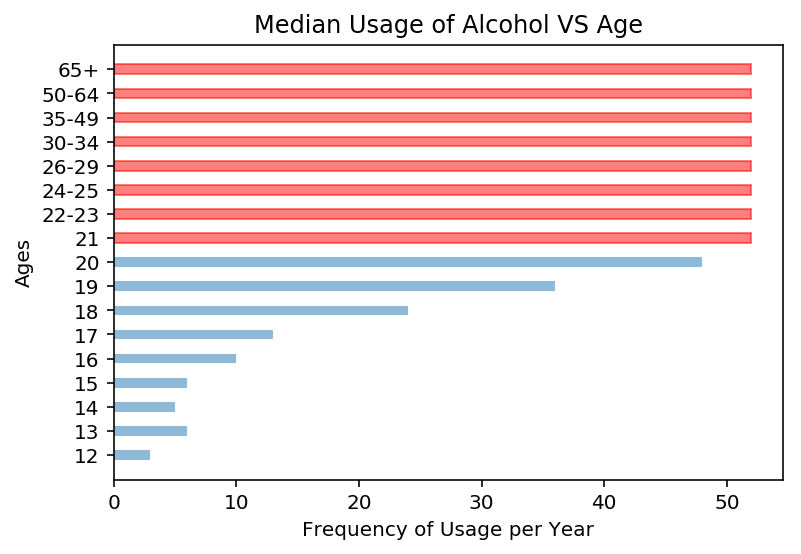

In [48]:
y_ticks=drug_prop['age']
y_space=range(0,len(drug_median['alcohol_median'])*2,2)

plt.figure()
plot1=plt.barh(y_space,drug_median['heroin_median'],align='center', alpha=0.5)
plot1[14].set_color('r')
plt.yticks(y_space, y_ticks)
plt.title('Median Usage of Heroin VS Age')
plt.xlabel('Frequency of Usage per Year')
plt.ylabel('Ages')
plt.show()

plt.figure()
plot1=plt.barh(y_space,drug_median['marijuana_median'],align='center', alpha=0.5)
plot1[13].set_color('r')
plt.yticks(y_space, y_ticks)
plt.title('Median Usage of Marijuana VS Age')
plt.xlabel('Frequency of Usage per Year')
plt.ylabel('Ages')
plt.show()

plt.figure()
plot1=plt.barh(y_space,drug_median['alcohol_median'],align='center', alpha=0.5)
plot1[9].set_color('r')
plot1[10].set_color('r')
plot1[11].set_color('r')
plot1[12].set_color('r')
plot1[13].set_color('r')
plot1[14].set_color('r')
plot1[15].set_color('r')
plot1[16].set_color('r')
plt.yticks(y_space, y_ticks)
plt.title('Median Usage of Alcohol VS Age')
plt.xlabel('Frequency of Usage per Year')
plt.ylabel('Ages')
plt.show()


In [49]:
# correlation of no. of users for the most users and most frequently used drugs
drug_prop.iloc[:,2:16].corr().loc[:,['heroin_use','marijuana_use','alcohol_use','painrelief_use']]

,heroin_use,marijuana_use,alcohol_use,painrelief_use
alcohol_use,0.558429,0.637058,1.000000,0.738412
marijuana_use,0.780250,1.000000,0.637058,0.960088
cocaine_use,0.903873,0.911635,0.745952,0.935381
crack_use,0.578998,0.624419,0.955363,0.716965
heroin_use,1.000000,0.780250,0.558429,0.838796
halluc_use,0.756483,0.913216,0.331000,0.817990
inhalant_use,-0.112796,0.068414,-0.413557,0.040221
painrelief_use,0.838796,0.960088,0.738412,1.000000
oxy_use,0.861244,0.958426,0.529195,0.931239
tranq_use,0.831272,0.948544,0.769957,0.969558


,heroin_use,marijuana_use,alcohol_use,painrelief_use
alcohol_use,0.558429,0.637058,1.000000,0.738412
marijuana_use,0.780250,1.000000,0.637058,0.960088
cocaine_use,0.903873,0.911635,0.745952,0.935381
crack_use,0.578998,0.624419,0.955363,0.716965
heroin_use,1.000000,0.780250,0.558429,0.838796
halluc_use,0.756483,0.913216,0.331000,0.817990
inhalant_use,-0.112796,0.068414,-0.413557,0.040221
painrelief_use,0.838796,0.960088,0.738412,1.000000
oxy_use,0.861244,0.958426,0.529195,0.931239
tranq_use,0.831272,0.948544,0.769957,0.969558


In [50]:
# correlation of  rate of use for the most users and most frequently used drugs
drug_median.iloc[:,2:16].corr().loc[:,['heroin_median','marijuana_median','alcohol_median','painrelief_median']]

,heroin_median,marijuana_median,alcohol_median,painrelief_median
alcohol_median,0.381874,0.818769,1.000000,0.007087
marijuana_median,0.277175,1.000000,0.818769,-0.285292
cocaine_median,0.149018,0.250348,0.391981,-0.107033
crack_median,0.298192,0.113860,0.333935,-0.001609
heroin_median,1.000000,0.277175,0.381874,-0.041496
halluc_median,-0.205455,-0.380430,-0.174622,0.547363
inhalant_median,0.048409,-0.598028,-0.305296,0.587035
painrelief_median,-0.041496,-0.285292,0.007087,1.000000
oxy_median,0.039502,0.040880,0.119852,0.561735
tranq_median,-0.202417,-0.591449,-0.415026,0.699282


,heroin_median,marijuana_median,alcohol_median,painrelief_median
alcohol_median,0.381874,0.818769,1.000000,0.007087
marijuana_median,0.277175,1.000000,0.818769,-0.285292
cocaine_median,0.149018,0.250348,0.391981,-0.107033
crack_median,0.298192,0.113860,0.333935,-0.001609
heroin_median,1.000000,0.277175,0.381874,-0.041496
halluc_median,-0.205455,-0.380430,-0.174622,0.547363
inhalant_median,0.048409,-0.598028,-0.305296,0.587035
painrelief_median,-0.041496,-0.285292,0.007087,1.000000
oxy_median,0.039502,0.040880,0.119852,0.561735
tranq_median,-0.202417,-0.591449,-0.415026,0.699282


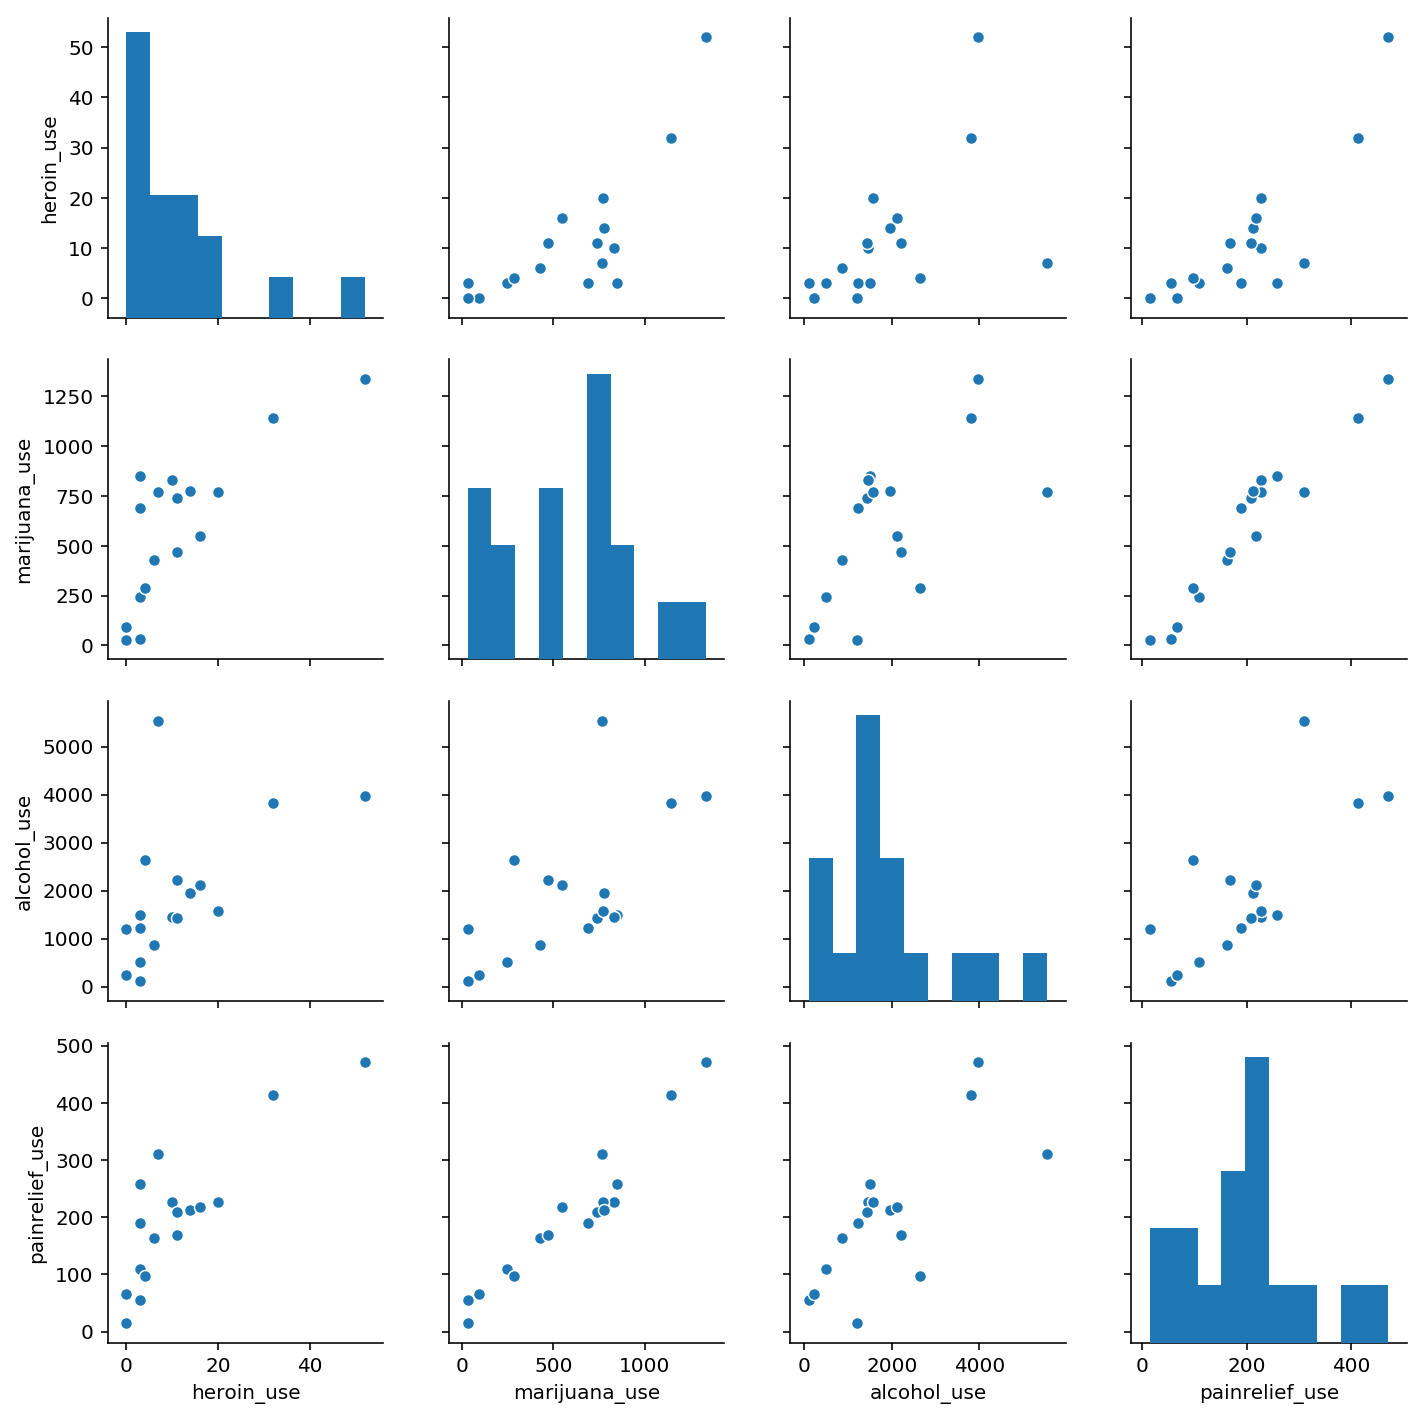

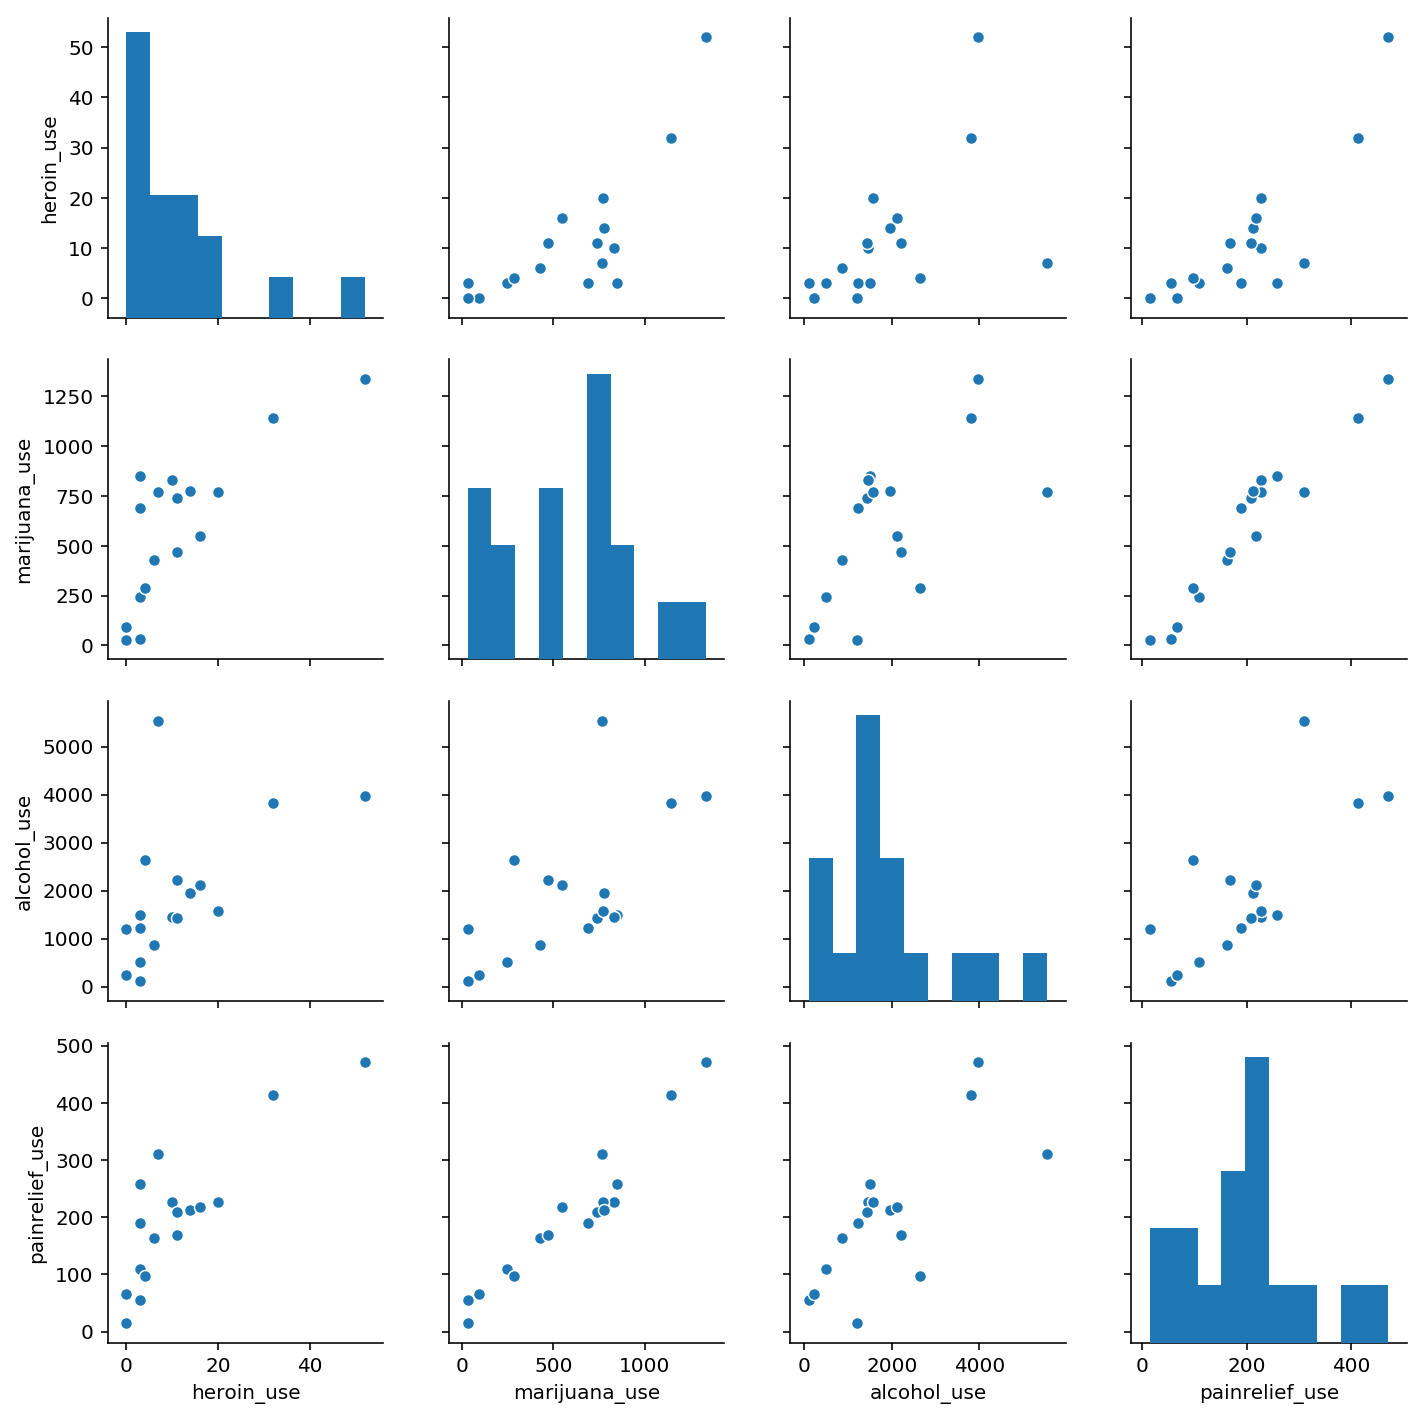

In [51]:
# total number of users for heroin, marijuana, alcohol, pain relief
sns.pairplot(drug_prop.loc[:,['heroin_use','marijuana_use','alcohol_use','painrelief_use']])

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


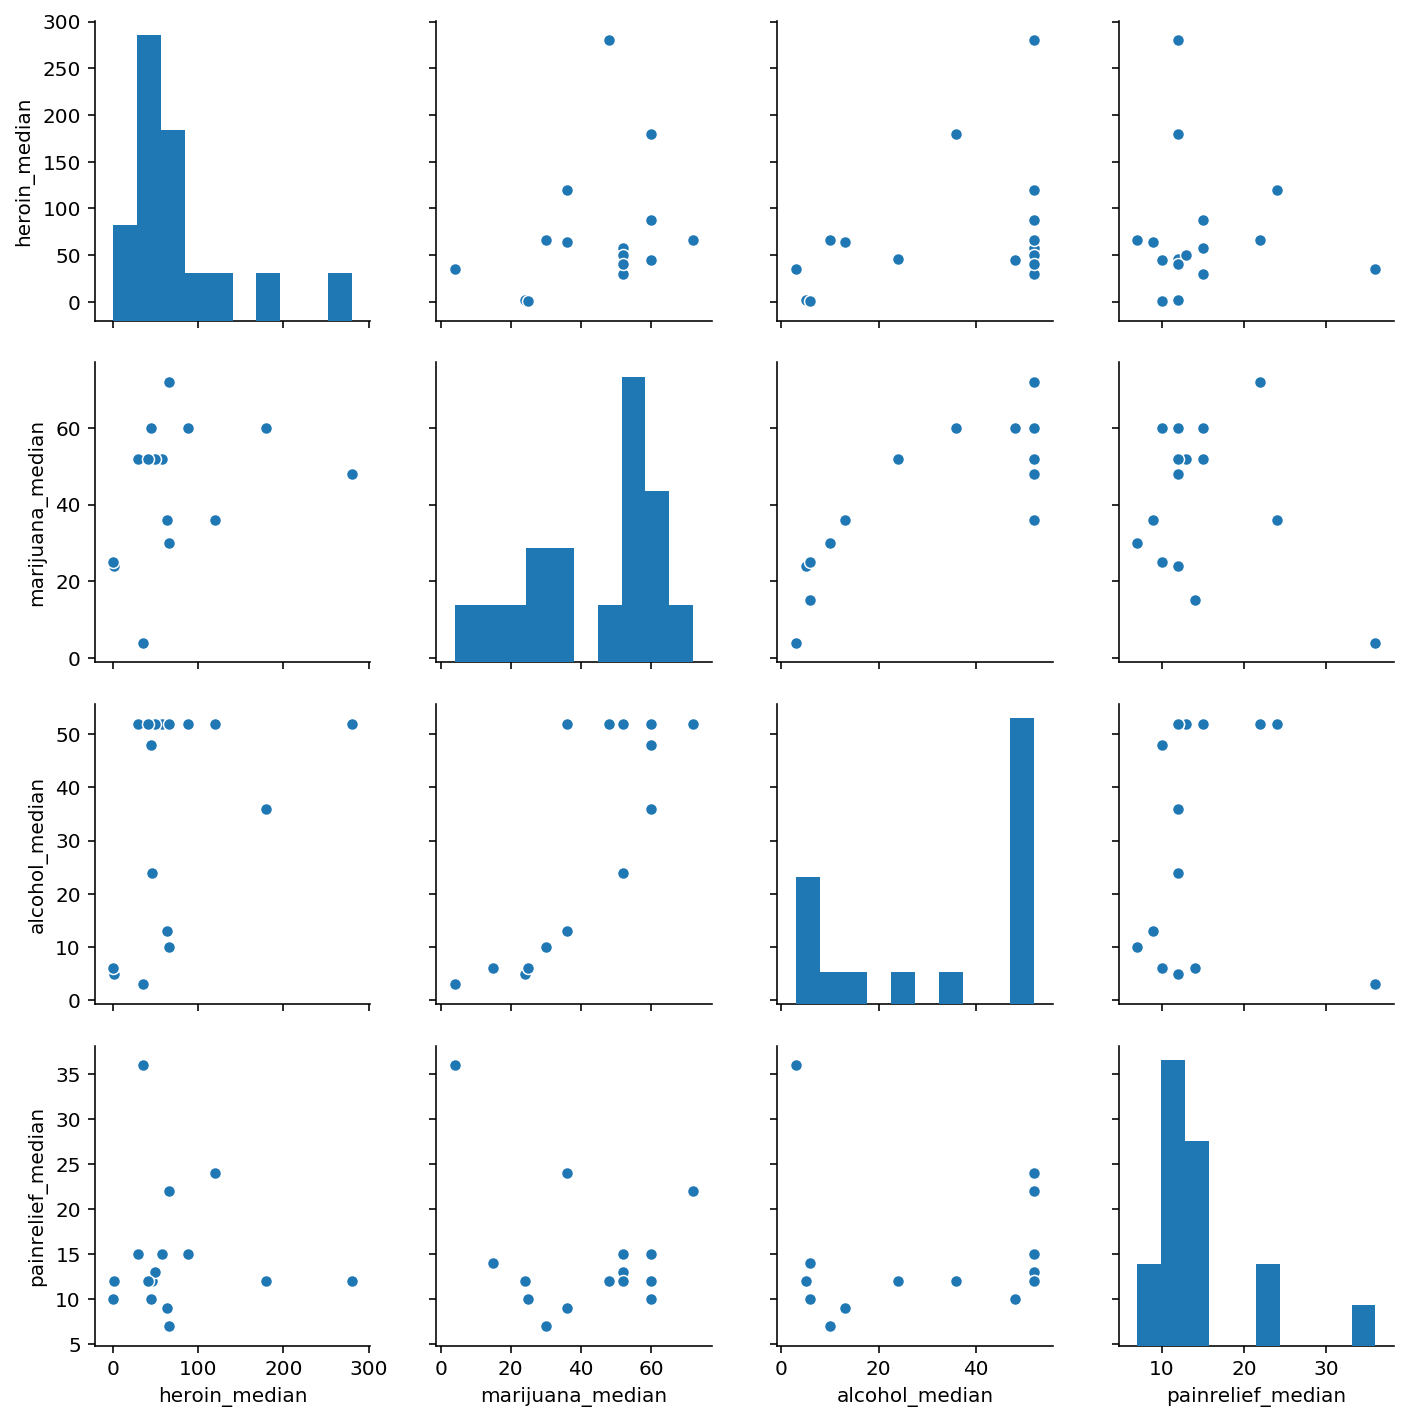

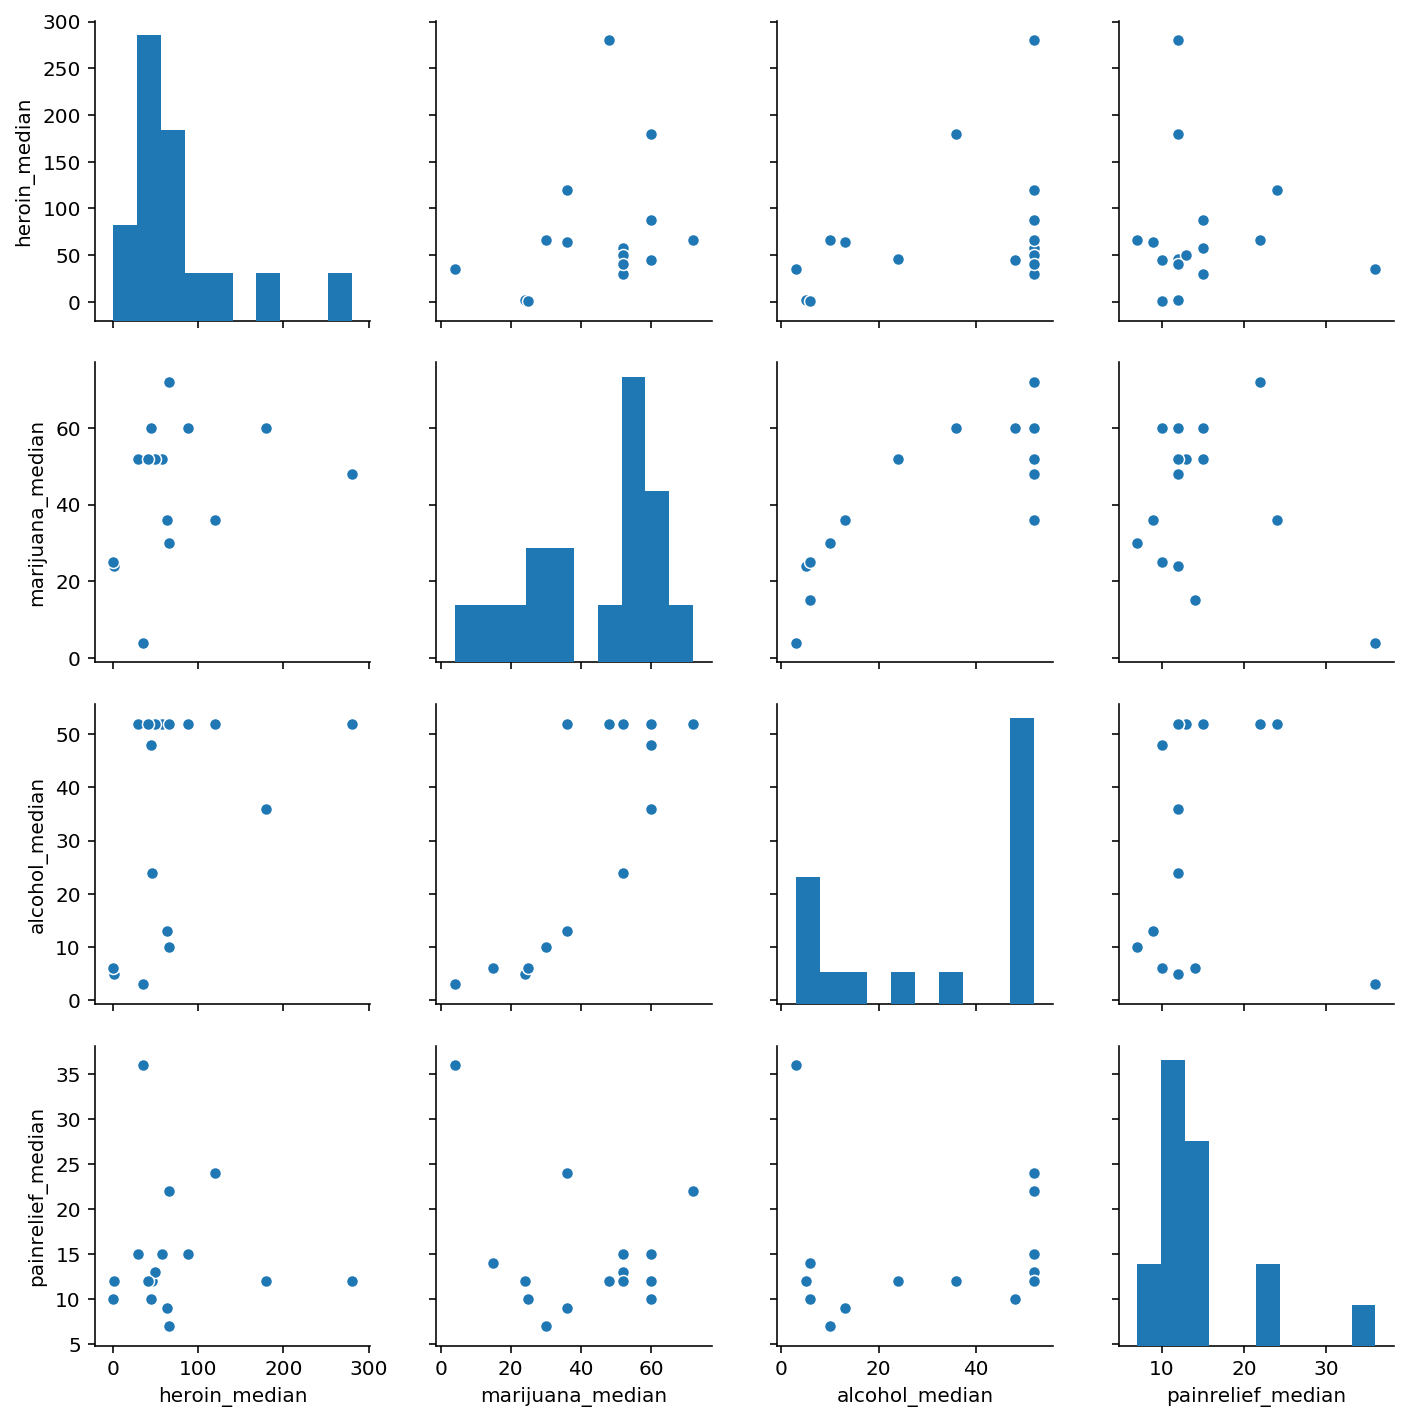

In [52]:
# rate of use for heroin, marijuana, alcohol, pain relief
sns.pairplot(drug_median.loc[:,['heroin_median','marijuana_median','alcohol_median','painrelief_median']])

# Objectives

1) investigating the drugs with the most users and with the highest rate of use per year

2) investigating which are drugs positively correlated in terms of no. of users and highest rate of use per year


# Observations Drawn:

**Investigation 1**: The Top 3 Drugs with the Most Number of Users( Total from all ages)

1) alcohol with 32367.0 users

2) marijuana with 10040.0 users

3) painrelief with 3411.0 users


**Investigation 2**: The age groups that contributes to the Top 3 Drugs

1) alcohol: age group 35-49

2) marijuana: age groups 22-23 and 24-25

3) pain relief: age groups 22-23 and 24-25.

**Investigation 3**: The Top 3 Drugs with the Highest Rate of Use

1) alcohol: age group 35-49

2) marijuana: age groups 22-23 and 24-25

3) pain relief: age groups 22-23 and 24-25.

**Investigation 4**: The Top 3 Drugs with the Highest Rate of Use (Total from all ages)

1) heroin: 1172.5 times per year

2) marijuana: 730.0 times per year

3) alcohol: 567.0 times per year

**Investigation 5**: The age groups that contributes to the Highest Rate for the top 3 Drugs

1) heroin: age group 35-49

2) marijuana: age group 30-34

3) alcohol: age group 21>

**Investigation 6**: Correlation between the Top 3 Drugs in terms of No of Users

- Alcohol users are strongly correlated with crack users. However, the no. of users for crack is significantly smaller than alcohol. As a result, this strong positive correlation can be considered quite a bias.

- Alcohol users are strongly correlated with marijuana users which is second most users. This is a promising discovery as there is could be a relation between the users of marijuana and alcohol.

- Pain Relief users are also strongly correlated with marijuana users, more positively correlated than alcohol is with marijuana. Again, this discovery shows promising signs that there could be some relation with the users of marijuana and pain relief. Both drugs have the same age group users that are in the similar magnitude range as compared to alcohol and marijuana users.


**Investigation 7**: Correlation between the Top 3 Drugs in terms of Rate of Use per year

- Heroin although has the highest rate of use per year is strongly positively correlated with meth. Both drugs have the smallest share of users in the sample. There relation could actually be a causation relation as there are reports of both drugs using at similar times

- Heroin has a weak positive correlation with alcohol and marijuana which are the two top drugs with the most users. This shows that when heroin usage per year increases drastically, the usage of marijuana and alcohol usage per year increase slightly. This 

- Alcohol and marijuana rate of use per year are strongly positively correlated. Again this is a promising sign that there could be some relation between alcohol and marijuana drugs.

- Pain relief and marijuana rate of use per year are actually negatively correlated. This shows that the even though the users of both drugs has a strong positively correlation, the negative correlated rate of use deters the investigation of determining if a larger portion of the sample users are actually consuming two drugs at the same time.


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [53]:
drug_prop.alcohol_use.describe()

count      17.000000
mean     1903.941176
std      1425.454816
min       109.000000
25%      1207.000000
50%      1498.000000
75%      2220.000000
max      5543.000000
Name: alcohol_use, dtype: float64

count      17.000000
mean     1903.941176
std      1425.454816
min       109.000000
25%      1207.000000
50%      1498.000000
75%      2220.000000
max      5543.000000
Name: alcohol_use, dtype: float64

** Question and deliverables**

**Question 1**
Are the alcohol and marijuana samples mean difference significant?

H0: Alcohol mean - Marijuana mean= 0

HA: Alochol mean - Marijuana mean != 0

**Question 2**
Are the alcohol and marijuana samples derived from the same population?

H0: Alcohol and Marijuana samples are from the same population

HA: Alcohol and Marijuana are sample from different population


In [54]:
round(drug_prop['alcohol_use'].mean())

1904

1904

Mean of Alcohol Drug Users: 1904
Mean of Marijuana Drug Users: 591
Difference of Marijuana and Alcohol means: 1313
Mean of Alcohol Drug Users: 1904
Mean of Marijuana Drug Users: 591
Difference of Marijuana and Alcohol means: 1313


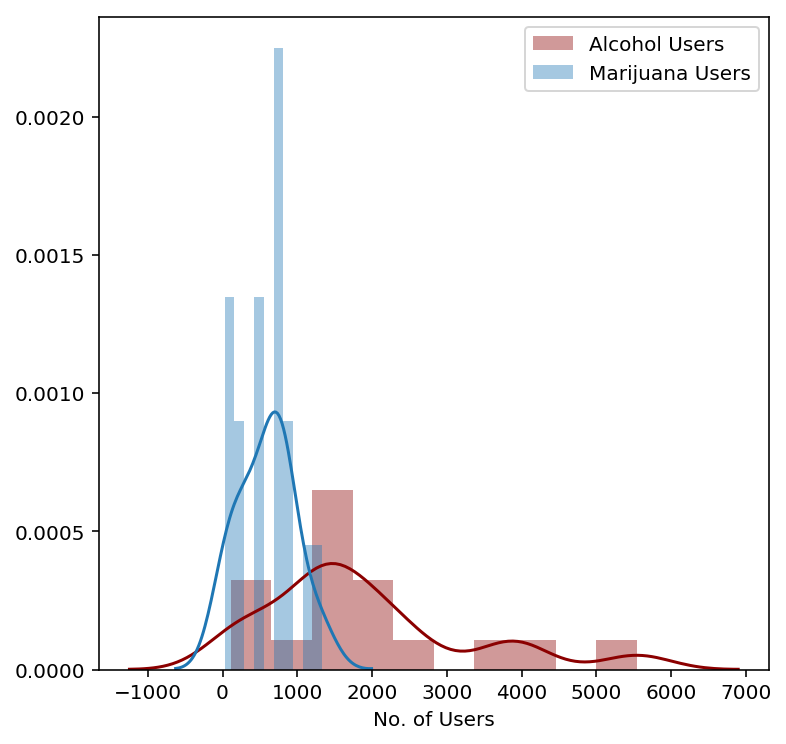

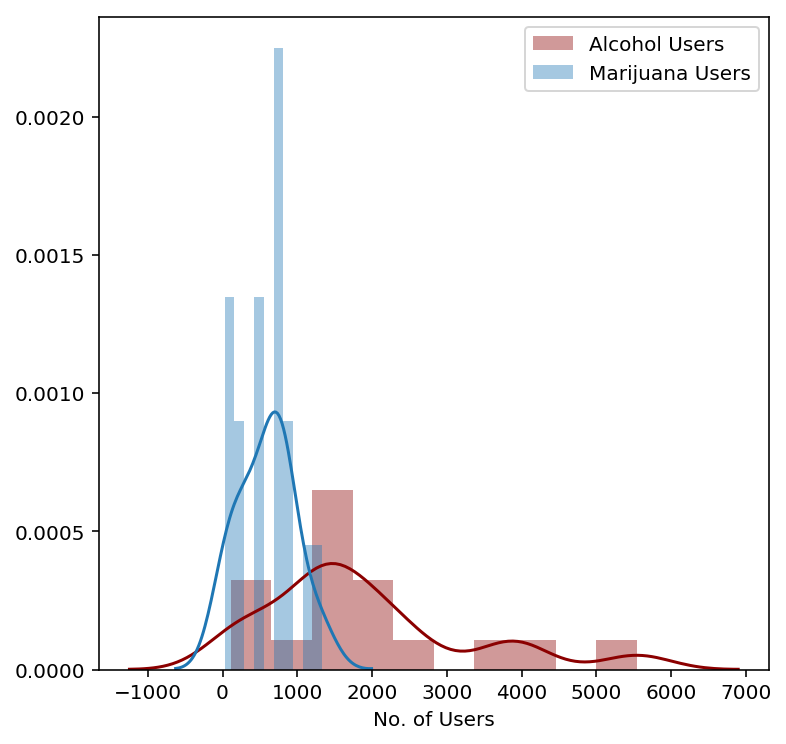

t-statistic is 3.6737676219898305
 p-value is 0.000867277631663271
t-statistic is 3.6737676219898305
 p-value is 0.000867277631663271


In [55]:
# Question 1: are the alcohol and marijuana samples mean difference significant?

print('Mean of Alcohol Drug Users: {}'.format(round(drug_prop['alcohol_use'].mean())))
print('Mean of Marijuana Drug Users: {}'.format(round(drug_prop['marijuana_use'].mean())))
print('Difference of Marijuana and Alcohol means: {}'.format(round(drug_prop['alcohol_use'].mean()-drug_prop['marijuana_use'].mean())))

# Verifying if the user sample data for alcohol and marijuana are normally distributed. 
# The sample size is 17 for both alcohol and marijuana. 
fig=plt.figure(figsize=(6,6))
ax=fig.gca()
sns.distplot(drug_prop['alcohol_use'],color='darkred',bins=10,label='Alcohol Users',ax=ax)
sns.distplot(drug_prop['marijuana_use'],bins=10,label='Marijuana Users',ax=ax)
plt.legend()
plt.xlabel('No. of Users')
plt.show()

# using t-test to determine if the null hypothese is to be rejected and accept the alternative hypothesis or is to be accepted
tval,pval=stats.ttest_ind(drug_prop['alcohol_use'],drug_prop['marijuana_use'])
print('t-statistic is {}\n p-value is {}'.format(tval,pval))


In [56]:
# Question 2: are the alcohol and marijuana samples derived from the same population using  two-sample Kolmogorov-Smirnov test
from scipy.stats import ks_2samp # importing two sample Kolmogorov-Smirnov test

ks_2samp(drug_prop['alcohol_use'],drug_prop['marijuana_use'])


Ks_2sampResult(statistic=0.7058823529411764, pvalue=0.0001634889017162538)

Ks_2sampResult(statistic=0.7058823529411764, pvalue=0.0001634889017162538)

**Report**

Question 1

Using Student T-Test:

Results:
- The null hypothesis is rejected and accept alternative hypothesis since p-value is less than 5% significant
- The difference in mean is significant

Question 2

Using Two-Sample Kolmogorov-Smirnov test:

Results:
- the null hypothese is rejected and accept alternative hypothesis since p-value is less than 5% significant 
- both samples are not obtained from the population




<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [57]:
import pylab

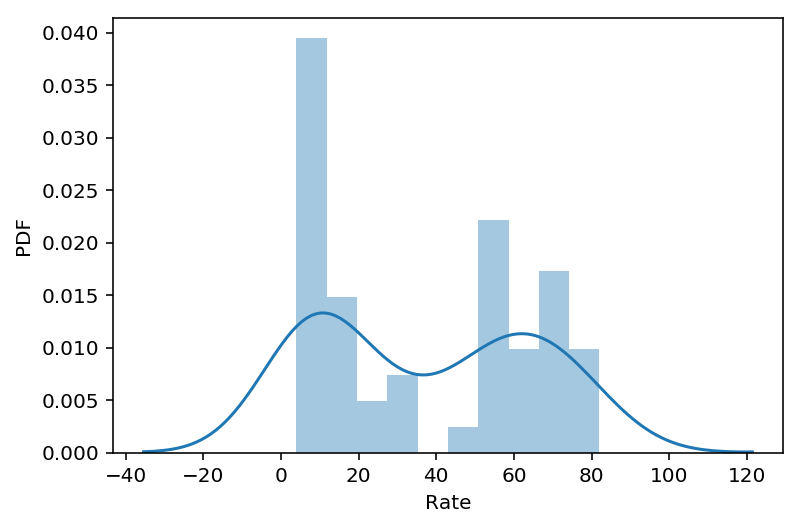

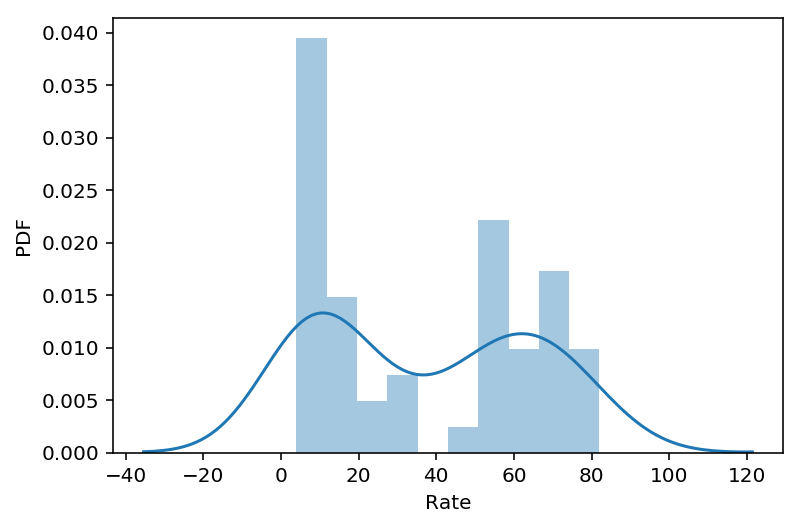

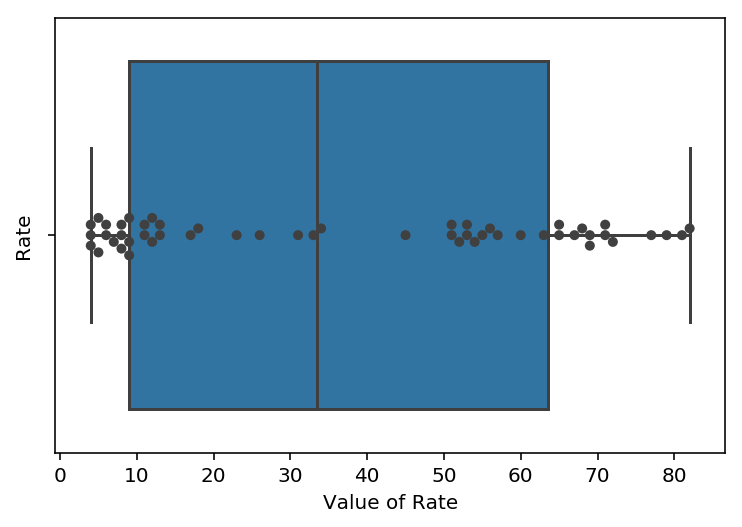

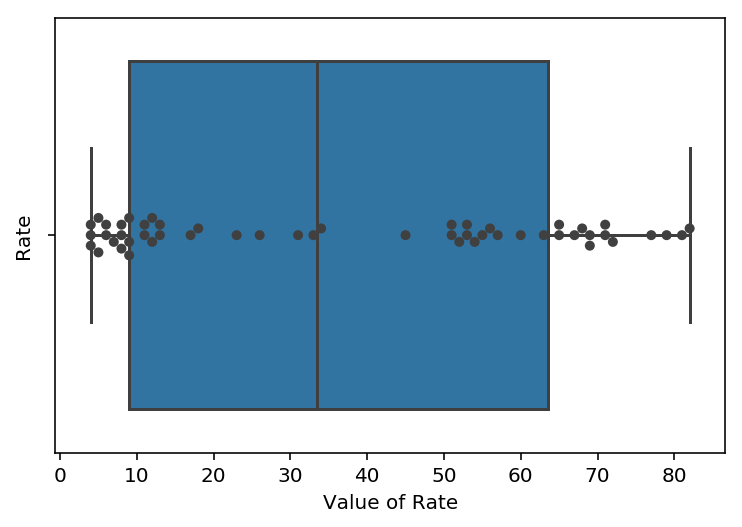

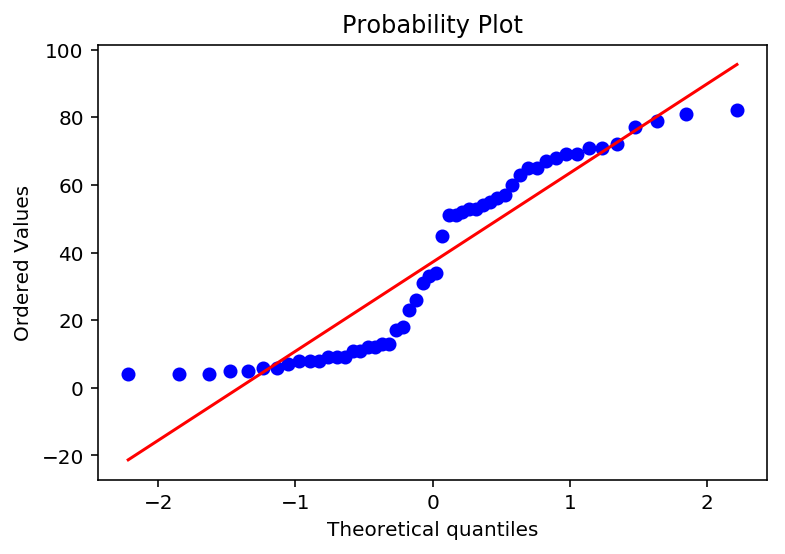

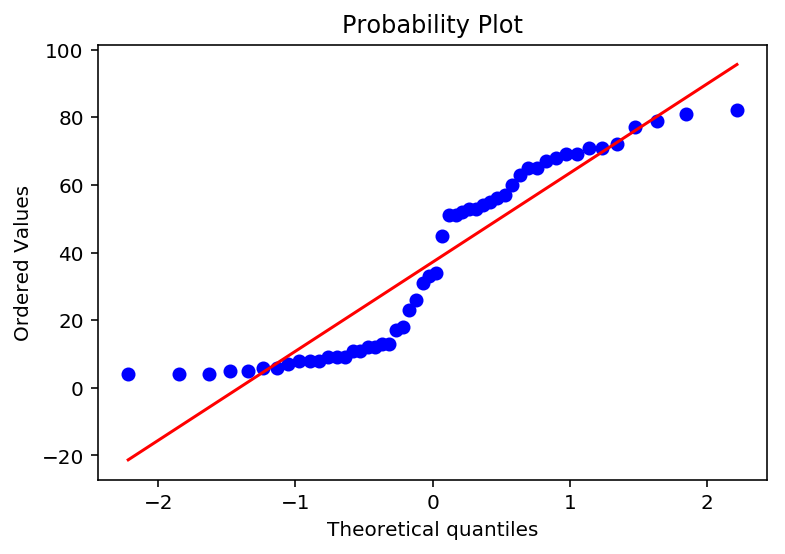

In [58]:
rate=df1["Rate"]
# plotting histogram to determine outliers
plt.figure()
sns.distplot(rate,bins=10,hist=True)
plt.xlabel('Rate')
plt.ylabel('PDF')
# plotting box plot to determine outliers
plt.figure()
sns.boxplot(rate)
sns.swarmplot(x=rate,color=".25")
plt.xlabel('Value of Rate')
plt.ylabel('Rate')
# plotting q-q plots
plt.figure()
stats.probplot(rate, dist="norm",plot=pylab)
plt.show()

**Histogram**

Based on the histogram diagram, the distribution of the rate data is a bimodal distribution.

**Boxplot (Interquartile Range)**

Based on the boxplot, because the distribution is bimodal, a big proportion of the data lies beyond 75th quartile and less than the 25th quartile.

**QQ Plot**

From the QQ plot, the distribution of the rate data is a bimodal distribution and outliers can be determined at 1.5 standard deviation away from the mean

# Using interquartile Range to Verify Outliers

no.of outliers> upperlimit: 13
no.of outliers< lowerlimit: 11
the 75th percentile is 63.5 and the 25th percentile is 9.0
no.of outliers> upperlimit: 13
no.of outliers< lowerlimit: 11
the 75th percentile is 63.5 and the 25th percentile is 9.0


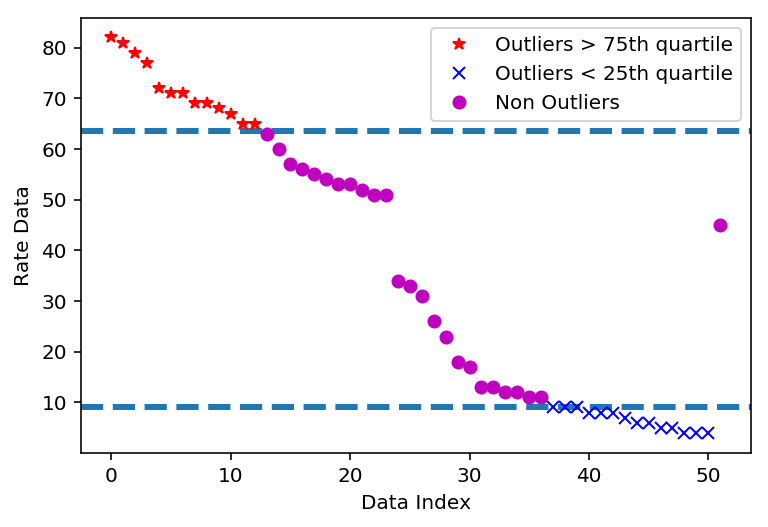

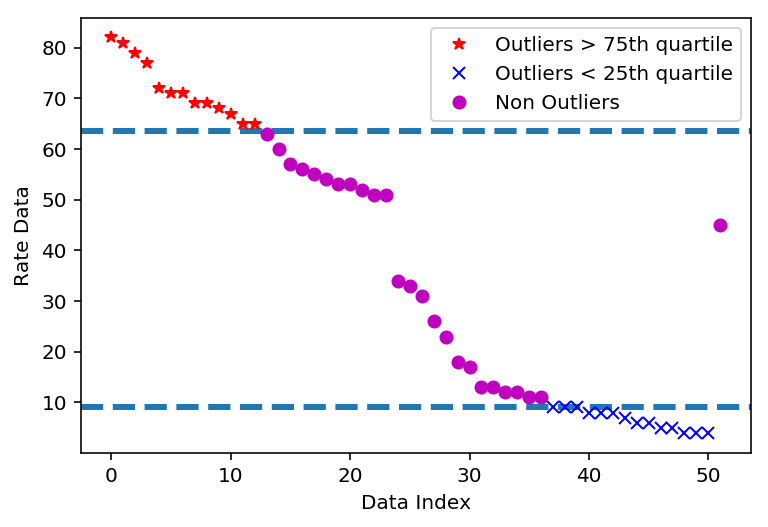

In [59]:
# Using interquartile range to determine outlier
q75, q25 = np.percentile(rate, [75 ,25])
print('no.of outliers> upperlimit:',rate[rate>q75].count())
print('no.of outliers< lowerlimit:',rate[rate<q25].count())

print('the 75th percentile is {} and the 25th percentile is {}'.format(q75,q25))
plt.figure
plt.axhline(q75,linewidth=3,linestyle='--') # 75th percentile
plt.axhline(q25,linewidth=3,linestyle='--') # 25th percentile
rate[rate>q75].plot(style='*r',label='Outliers > 75th quartile')
rate[rate<=q25].plot(style='xb',label='Outliers < 25th quartile')
rate[(rate>q25) & (rate<q75)].plot(style='om',label='Non Outliers')
plt.xlabel('Data Index')
plt.ylabel('Rate Data')
plt.legend()
plt.show()


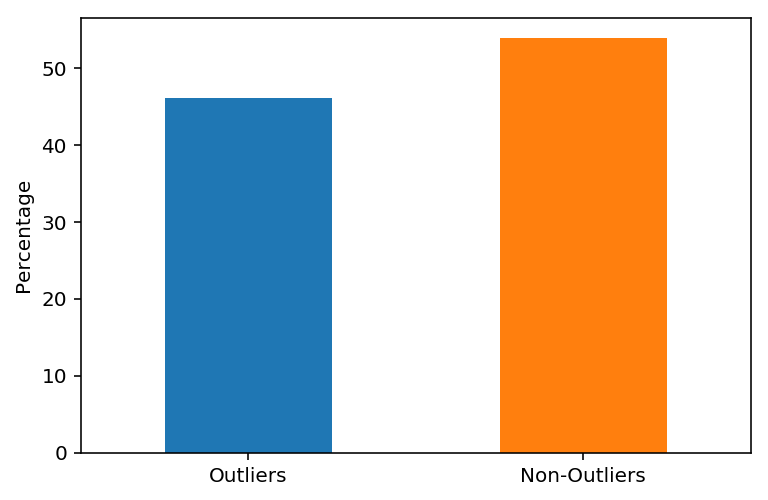

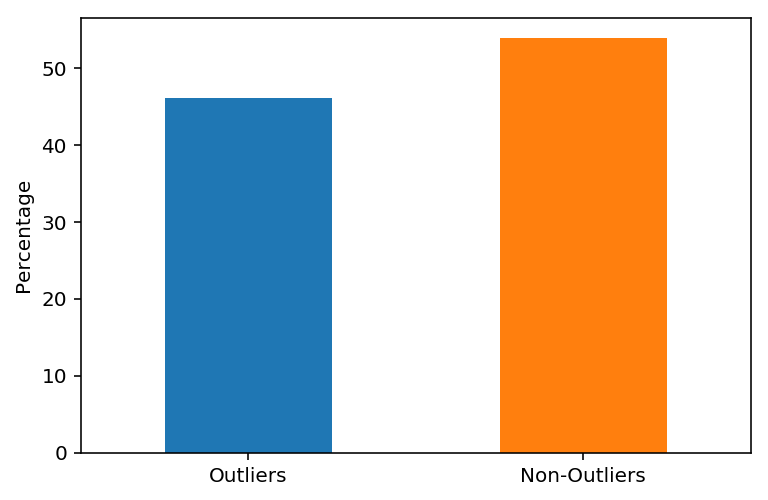

In [60]:
# Proportion of outliers and remainder
no_out=(rate[rate>q75].count()+rate[rate<q25].count())/len(rate)*100
remainder=100-no_out
arr=np.array([no_out,remainder])
data1=pd.DataFrame(arr)
data1=data1.rename(index={0:"Outliers",1:"Non-Outliers"})
plt.figure()
data1[0].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

# Using interquartile range, almost half of the data is gone which is not a feasible method to determine outliers.

# Using 1.5 standard deviation from mean to determine outliers

In [61]:
rate_det=rate.describe()
rate_det

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [62]:
low_limit=rate_det[1]-1.2*rate_det[2]
print('lower limit',low_limit)
upp_limit=rate_det[1]+1.5*rate_det[2]
print('upper limit',upp_limit)
print('no.of outliers> upper limit:',rate[rate>upp_limit].count())
print('no.of outliers< lower limit:',rate[rate<low_limit].count())

lower limit 4.391700466403009
upper limit 78.10652826315008
no.of outliers> upper limit: 3
no.of outliers< lower limit: 3
lower limit 4.391700466403009
upper limit 78.10652826315008
no.of outliers> upper limit: 3
no.of outliers< lower limit: 3


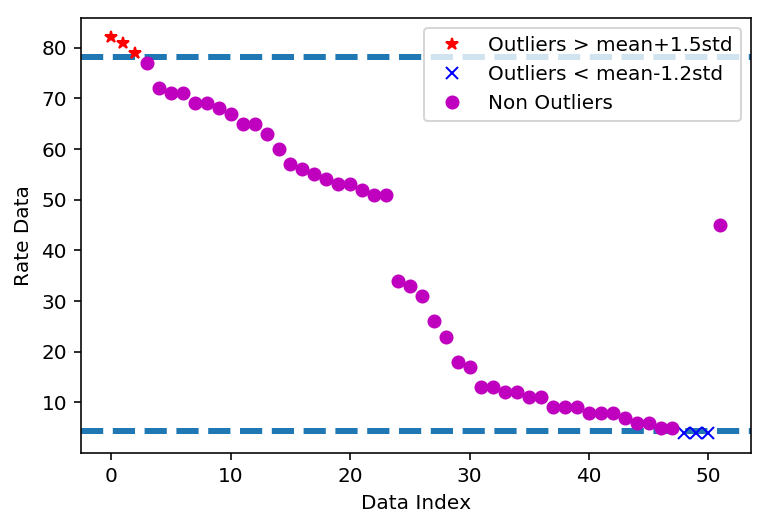

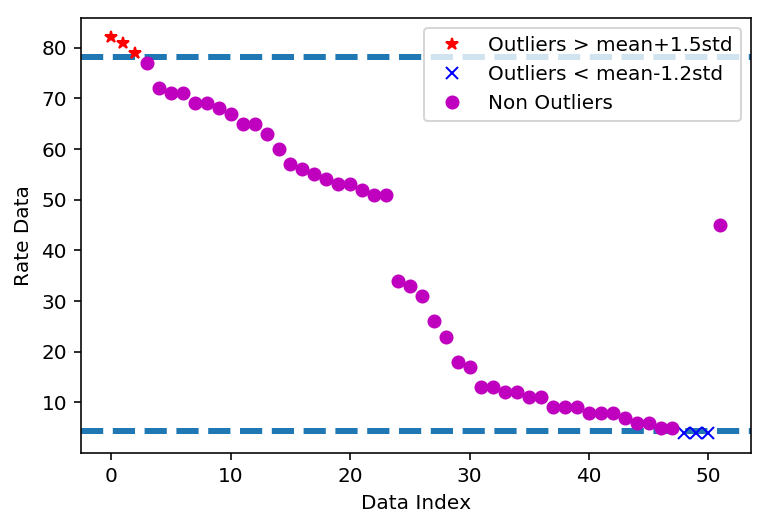

In [63]:
plt.figure
plt.axhline(low_limit,linewidth=3,linestyle='--') # mean-1.2std
plt.axhline(upp_limit,linewidth=3,linestyle='--') # mean+1.5std
rate[rate>upp_limit].plot(style='*r',label='Outliers > mean+1.5std')
rate[rate<low_limit].plot(style='xb',label='Outliers < mean-1.2std')
rate[(rate>low_limit) & (rate<upp_limit)].plot(style='om',label='Non Outliers')
plt.xlabel('Data Index')
plt.ylabel('Rate Data')
plt.legend()
plt.show()

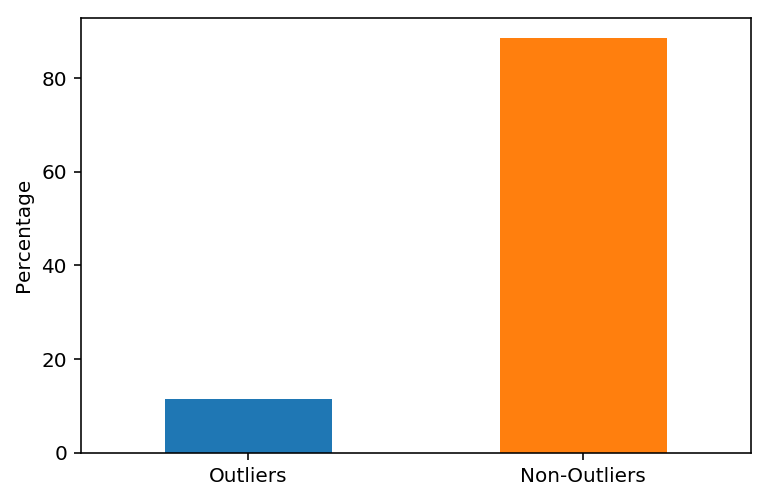

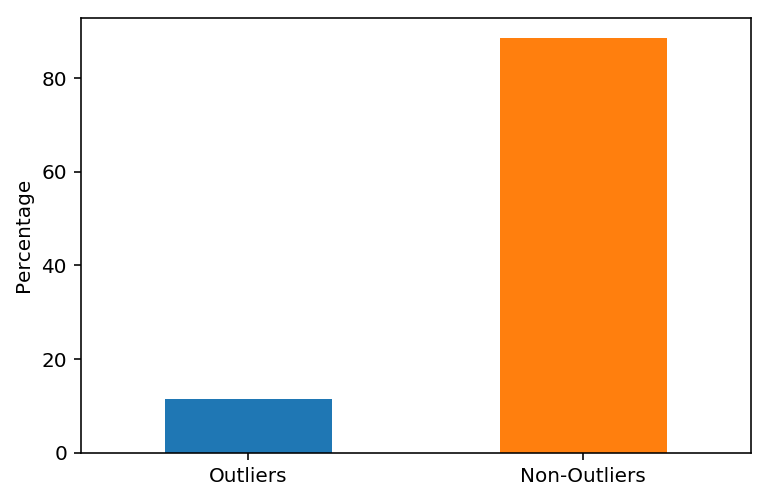

In [64]:
# Proportion of outliers and remainder
no_out1=(rate[rate>upp_limit].count()+rate[rate<low_limit].count())/len(rate)*100
remainder1=100-no_out1
arr1=np.array([no_out1,remainder1])
data2=pd.DataFrame(arr1)
data2=data2.rename(index={0:"Outliers",1:"Non-Outliers"})
plt.figure()
data2[0].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

# because the distribution of rate is bimodal.
# by taking standard deviation away from the mean to determine the upper limit and lower limit to determine the outliers
# majority of the data is retained and only minor extreme outliers are removed.

In [65]:
d1=np.array([cleaned_info,rate_det])
summary1=pd.DataFrame(d1)
summary1.columns=['count','mean','std','min','25%','50%','75%','max']
summary1.rename(index={0:'cleaned',1:'uncleaned'},inplace=True)

NameError: name 'cleaned_info' is not defined

NameError: name 'cleaned_info' is not defined

In [ ]:
plt.figure()
summary1.T.plot(kind='bar',label=['uncleaned data','cleaned data'])
plt.title('Difference between cleaned and uncleaned rate data')
plt.show()


**Summary Observation**:

After the data is cleansed off outliers, there is a slight improvement to the standard deviation which means the data is less dispersed. 

There is a reduction in mean bringing it closer to the to the median, making the overall distribution more normally distributed and less skewed

The maximum value also reduced as the extremities has been removed which are most likely the outliers. Similar scenario can be observed with the minimum. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [ ]:
df1[['Verbal','Math']].corr(method='spearman')

In [ ]:
df1[['Verbal','Math']].corr(method='pearson')

1) How does the spearman correlation compare to the pearson correlation?

**Spearman correlation** describes a distribution correlation based on a **monotonic relationship** while the **Pearson correlation** describes a distribution correlation based on a **linear relationship**

2) Describe clearly in words the process of calculating the Spearman rank correlation

a) collect data in the form on pairs of values x and y

b) rank the data from x variable where 1 is lowerst to n the highest, n= number of pairs of data in data set

c) complete step two with the data from the y variable

d) find the standard deviation of the ranks of the x-values, using the usual standard deviation (Sxx , Syy) formula

e) find the covariance of the x-y values, Sxy

f) calculate rx=sxy/(sxx syy)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.